#I. Extracción

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_json('/content/TelecomX_Data.json')
df


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#II. Transformación

In [ ]:
# Normalizar cada una de las columnas del dataframe
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [ ]:
# Extrae las columnas que no son JSON (customerID y Churn)
customerID = df['customerID']
Churn = df['Churn']


In [ ]:
# concatenar las columnas en un solo dataframe
df = pd.concat([customerID, Churn, df_customer, df_phone, df_internet, df_account], axis=1)

df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4953,6766-HFKLA,No,Female,0,Yes,No,56,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),103.20,5744.35
2007,2834-JRTUA,Yes,Male,0,No,No,71,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,108.05,7532.15
7112,9795-NREXC,No,Female,0,Yes,No,64,Yes,Yes,DSL,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.00,5484.4
1748,2481-SBOYW,No,Female,0,No,Yes,61,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.00,1498.35
3108,4325-NFSKC,Yes,Male,1,No,No,19,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.60,1660


In [ ]:
# Abrir archivo .md y mostrar el contenido del diccionario como texto
with open('/content/TelecomX_diccionario.md', 'r', encoding='utf-8') as f:
    contenido = f.read()

print(type(contenido))  # <class 'str'>
print(contenido)        # Imprime el contenido como texto


<class 'str'>
#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
-

In [ ]:
# Ver cuántos valores nulos hay por columna
df.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
# Mostrar todas las filas que tienen al menos un valor nulo
print ('El numero de valores nulos es:', len(df[df.isnull().any(axis=1)]))

El numero de valores nulos es: 0


In [ ]:
df.shape

(7267, 21)

In [ ]:
# Filas que están duplicadas exactamente (incluida la primera aparición)
duplicados_completos = df[df.duplicated(keep=False)]

# Opcional: Ordenar para que las filas duplicadas queden juntas
duplicados_ordenados = duplicados_completos.sort_values(by=df.columns.tolist())


print('El numero de filas duplicadas es: ', len(duplicados_ordenados))


El numero de filas duplicadas es:  0


In [ ]:
df.head(1)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3


In [ ]:
# Verificar los tipos de datos
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [ ]:
# Verificacion del tipo de dato de cada una una de las celdas de las columnas
columnas = [
    'customerID',	'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total'
]

for col in columnas:
    print(f"Tipos en la columna '{col}':")
    print(df[col].apply(type).value_counts())
    print(df[col].isna().sum())
    print("-" * 40)


Tipos en la columna 'customerID':
customerID
<class 'str'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'Churn':
Churn
<class 'str'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'gender':
gender
<class 'str'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'SeniorCitizen':
SeniorCitizen
<class 'int'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'Partner':
Partner
<class 'str'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'Dependents':
Dependents
<class 'str'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'tenure':
tenure
<class 'int'>    7267
Name: count, dtype: int64
0
----------------------------------------
Tipos en la columna 'PhoneService':
PhoneService
<class 'str'>    7267
Nam

In [ ]:
# Cambio de tipo 'object' de la columna 'Charges.Total' a tipo 'float'
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Verifica si la conversión funcionó
print(df['Charges.Total'].apply(type).value_counts())
print(df['Charges.Total'].isna().sum())



Charges.Total
<class 'float'>    7267
Name: count, dtype: int64
11


In [ ]:
#Existen 11 valores nulos
df_nulos = df[df['Charges.Total'].isna()]
display(df_nulos)



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [ ]:
#Para cada fila donde 'Charges.Total' es NaN, reemplazar ese NaN con el valor de 'Charges.Monthly' * 0.5'
#ya que la columna tenure o antiguedad en meses es igual a cero en estos casos debido a que es primer mes del cliente
#por lo que se va usar 'Charges.Monthly' * 0.5' como valor promedio para 'Charges.Total'

# La formulacion es: df.loc[condición, 'columna'] = nuevo_valor
df.loc[df['Charges.Total'].isna(), 'Charges.Total'] = (df['Charges.Monthly'] * 0.5)


In [ ]:
#Verificacion de transformacion de valores NaN
df_nulos = df[df['Charges.Total'].isna()]
display(df_nulos)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [ ]:
# verificar si fueron cambiados correctamente
df.iloc[[975, 1955, 2930, 5599]]



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,28.025
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,30.950
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,36.675
5599,7644-OMVMY,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,9.925


In [ ]:
#verificar que los demas registros no fuero cambiados
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
# Ultima verificación de columna Charges.Total
print(df['Charges.Total'].apply(type).value_counts())
print(df['Charges.Total'].isna().sum())

Charges.Total
<class 'float'>    7267
Name: count, dtype: int64
0


In [ ]:
# Estandarización de los encabezados de las columnas
import re

# Función para estandarizar los nombres de las columnas
def estandarizar_columna(nombre):
    nombre = re.sub(r'(?<=[a-z])(?=[A-Z])', '_', nombre)  # separa camel case, Reemplazando cada coincidencia del patrón con un guion bajo (_) en la variable nombre.
    nombre = nombre.replace('.', '_')                     # reemplaza puntos
    nombre = nombre.strip().lower()                       # minúsculas y sin espacios
    return nombre

# Aplicar la función a los nombres de las columnas
df.columns = [estandarizar_columna(col) for col in df.columns]
df.columns


Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'charges_monthly',
       'charges_total'],
      dtype='object')

In [ ]:
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
# Estandarización en los registros de las columnas 'object'

for col in df.select_dtypes(include='object').columns:
    df[col] = (
        df[col]
        .astype(str)                                 # Asegura strings
        .str.strip()                                 # Elimina espacios al inicio/final
        .str.lower()                                 # Convierte a minúsculas
        .str.replace(r'[\s\-]+', '_', regex=True)    # Reemplaza espacios y guiones medio por guion bajo
    )

df


,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002_orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one_year,yes,mailed_check,65.60,593.30
1,0003_mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month_to_month,no,mailed_check,59.90,542.40
2,0004_tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,no,yes,no,no,no,month_to_month,yes,electronic_check,73.90,280.85
3,0011_igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,yes,no,yes,yes,month_to_month,yes,electronic_check,98.00,1237.85
4,0013_exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,no,yes,yes,no,month_to_month,yes,mailed_check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987_lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,no,yes,no,no,one_year,no,mailed_check,55.15,742.90
7263,9992_rramn,yes,male,0,yes,no,22,yes,yes,fiber_optic,...,no,no,no,no,yes,month_to_month,yes,electronic_check,85.10,1873.70
7264,9992_ujoel,no,male,0,no,no,2,yes,no,dsl,...,yes,no,no,no,no,month_to_month,yes,mailed_check,50.30,92.75
7265,9993_lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,no,yes,yes,no,yes,two_year,no,mailed_check,67.85,4627.65


In [ ]:
#Mostrar valores únicos por cada columna
for col in df.columns:
    print(f"\nColumna: '{col}'")
    print(df[col].unique())



Columna: 'customer_id'
['0002_orfbo' '0003_mknfe' '0004_tlhlj' ... '9992_ujoel' '9993_lhieb'
 '9995_hotoh']

Columna: 'churn'
['no' 'yes' '']

Columna: 'gender'
['female' 'male']

Columna: 'senior_citizen'
[0 1]

Columna: 'partner'
['yes' 'no']

Columna: 'dependents'
['yes' 'no']

Columna: 'tenure'
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Columna: 'phone_service'
['yes' 'no']

Columna: 'multiple_lines'
['no' 'yes' 'no_phone_service']

Columna: 'internet_service'
['dsl' 'fiber_optic' 'no']

Columna: 'online_security'
['no' 'yes' 'no_internet_service']

Columna: 'online_backup'
['yes' 'no' 'no_internet_service']

Columna: 'device_protection'
['no' 'yes' 'no_internet_service']

Columna: 'tech_support'
['yes' 'no' 'no_internet_service']

Columna: 'streaming_tv'
['yes' 'no' 'no_internet_service']

Columna: 's

In [ ]:
# Cantidad de cadenas vacias en la columna 'churn'

num_cadenas_vacias = (df['churn'] == '').sum()
print(num_cadenas_vacias)


224


Debido a que entre los datos que maneja la columna 'churn' esta el de cadena vacia:['No' 'Yes' ''], no es posible saber si esos clientes fueron dados de baja o no, por lo tando estas filas seran eliminadas y guardadas en un archivo, "clientes_por_vericar.csv", con el fin de que se defina la condición de sus clientes para hacer un analisis posterior. Ademas se puede verifica que la cantidad de filas eliminadas es 224 lo cual representa apenas: (224/7267) * 100 = 3.1%, lo cual no es representativo para nuestro analisis estadistico

In [ ]:
# Guardar filas eliminadas

# Filtrar las filas donde 'churn' es una cadena vacía
filas_vacias = df[df['churn'] == '']

# Guardar esas filas en un archivo CSV
filas_vacias.to_csv('clientes_por_vericar.csv', index=False)



In [ ]:
# verificacion del archivo 'clientes_por_vericar.csv'

df_clientes_por_vericar = pd.read_csv('/content/clientes_por_vericar.csv', keep_default_na=False)
df_clientes_por_vericar.head()


,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0047_zhdtw,,female,0,no,no,11,yes,yes,fiber_optic,...,no,no,no,no,no,month_to_month,yes,bank_transfer_(automatic),79.00,929.30
1,0120_yzlqa,,male,0,no,no,71,yes,no,no,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,yes,credit_card_(automatic),19.90,1355.10
2,0154_qyhju,,male,0,no,no,29,yes,no,dsl,...,yes,no,yes,no,no,one_year,yes,electronic_check,58.75,1696.20
3,0162_rzgmz,,female,1,no,no,5,yes,no,dsl,...,yes,no,yes,no,no,month_to_month,no,credit_card_(automatic),59.90,287.85
4,0274_vvqoq,,male,1,yes,no,65,yes,yes,fiber_optic,...,yes,yes,no,yes,yes,one_year,yes,bank_transfer_(automatic),103.15,6792.45


In [ ]:
# Eliminar en el dataframe original, df, las filas donde la columna 'churn', tenga cadenas vacias

# Mantener solo las filas donde churn NO es cadena vacía
# Convertir en una copia explícita el resultado del filtro, porque sino se hace pandas podria
# pensar que la asignacion, df, es una vista, y va ha generar una Advertencia cuando adicione la columna 'charges_monthly'
# El df original ya no existe, a menos que lo hubieras guardado previamente en otra variable
# la variable df ahora apunta a ese nuevo DataFrame filtrado.
df = df[df['churn'] != ''].copy()
df


,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002_orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one_year,yes,mailed_check,65.60,593.30
1,0003_mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month_to_month,no,mailed_check,59.90,542.40
2,0004_tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,no,yes,no,no,no,month_to_month,yes,electronic_check,73.90,280.85
3,0011_igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,yes,no,yes,yes,month_to_month,yes,electronic_check,98.00,1237.85
4,0013_exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,no,yes,yes,no,month_to_month,yes,mailed_check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987_lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,no,yes,no,no,one_year,no,mailed_check,55.15,742.90
7263,9992_rramn,yes,male,0,yes,no,22,yes,yes,fiber_optic,...,no,no,no,no,yes,month_to_month,yes,electronic_check,85.10,1873.70
7264,9992_ujoel,no,male,0,no,no,2,yes,no,dsl,...,yes,no,no,no,no,month_to_month,yes,mailed_check,50.30,92.75
7265,9993_lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,no,yes,yes,no,yes,two_year,no,mailed_check,67.85,4627.65


In [ ]:
# verificar que se hayan eliminado las filas con cadena vacia de la columna 'churn'
print(f"Valores unicos en la columna 'churn': {df['churn'].unique()}")



Valores unicos en la columna 'churn': ['no' 'yes']


In [ ]:
# Veificacion de numero de filas
df.shape

(7043, 21)

In [ ]:
# "Restablecer índices"
df.reset_index(drop=True, inplace=True)


In [ ]:
# Creacion de columna cuentas diarias
df['daily_account'] = df['charges_monthly'] / 30
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,daily_account
0,0002_orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one_year,yes,mailed_check,65.6,593.30,2.186667
1,0003_mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month_to_month,no,mailed_check,59.9,542.40,1.996667
2,0004_tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,yes,no,no,no,month_to_month,yes,electronic_check,73.9,280.85,2.463333
3,0011_igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,no,yes,yes,month_to_month,yes,electronic_check,98.0,1237.85,3.266667
4,0013_exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,yes,yes,no,month_to_month,yes,mailed_check,83.9,267.40,2.796667


In [ ]:
# Reubicar la columna daily_account
# Paso 1: Sacar la columna
columna = df.pop('daily_account')

# Paso 2: Insertarla en la posición deseada (posición 20 → índice 19)
df.insert(19, 'daily_account', columna)
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,daily_account,charges_monthly,charges_total
0,0002_orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one_year,yes,mailed_check,2.186667,65.6,593.30
1,0003_mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month_to_month,no,mailed_check,1.996667,59.9,542.40
2,0004_tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,yes,no,no,no,month_to_month,yes,electronic_check,2.463333,73.9,280.85
3,0011_igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,no,yes,yes,month_to_month,yes,electronic_check,3.266667,98.0,1237.85
4,0013_exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,yes,yes,no,month_to_month,yes,mailed_check,2.796667,83.9,267.40


In [ ]:
# redondear decimales a un digito
columnas = ['daily_account', 'charges_monthly', 'charges_total']
df[columnas] = df[columnas].round(1)
df.head()


,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,daily_account,charges_monthly,charges_total
0,0002_orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one_year,yes,mailed_check,2.2,65.6,593.3
1,0003_mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month_to_month,no,mailed_check,2.0,59.9,542.4
2,0004_tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,yes,no,no,no,month_to_month,yes,electronic_check,2.5,73.9,280.8
3,0011_igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,no,yes,yes,month_to_month,yes,electronic_check,3.3,98.0,1237.8
4,0013_exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,yes,yes,no,month_to_month,yes,mailed_check,2.8,83.9,267.4


In [ ]:
# Verificar que la columna recien creada, 'daily_account' sea tipo float
df['daily_account'].dtype

dtype('float64')

In [ ]:
# Traducir los encabezados de las columnas
df = df.rename(columns={
    'customer_id': 'id_cliente',
    'churn': 'desafiliado',
    'gender': 'genero',
    'senior_citizen': 'persona_mayor',
    'partner': 'pareja',
    'dependents': 'dependientes',
    'tenure': 'antiguedad',
    'phone_service': 'servicio_telefonico',
    'multiple_lines': 'multiples_lineas',
    'internet_service': 'servicio_de_internet',
    'online_security': 'seguridad_en_linea',
    'online_backup': 'copia_de_seguridad_en_linea',
    'device_protection': 'proteccion_de_dispositivos',
    'tech_support': 'soporte_tecnico',
    'streaming_tv': 'television_en_streaming',
    'streaming_movies': 'peliculas_en_streaming',
    'contract': 'contrato',
    'paperless_billing': 'facturacion_electronica',
    'payment_method': 'metodo_de_pago',
    'daily_account': 'cargo_diario',
    'charges_monthly': 'cargo_mensual',
    'charges_total': 'cargo_total'
})
df.head()

,id_cliente,desafiliado,genero,persona_mayor,pareja,dependientes,antiguedad,servicio_telefonico,multiples_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,television_en_streaming,peliculas_en_streaming,contrato,facturacion_electronica,metodo_de_pago,cargo_diario,cargo_mensual,cargo_total
0,0002_orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one_year,yes,mailed_check,2.2,65.6,593.3
1,0003_mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month_to_month,no,mailed_check,2.0,59.9,542.4
2,0004_tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,yes,no,no,no,month_to_month,yes,electronic_check,2.5,73.9,280.8
3,0011_igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,no,yes,yes,month_to_month,yes,electronic_check,3.3,98.0,1237.8
4,0013_exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,yes,yes,no,month_to_month,yes,mailed_check,2.8,83.9,267.4


In [ ]:
# Traducir al español los registros

# Diccionario de traducción para todos los valores únicos
traduccion = {
    # Valores generales yes/no
    'yes': 'si',
    'no': 'no',

    # Género
    'female': 'femenino',
    'male': 'masculino',

    # Servicios específicos
    'no_phone_service': 'sin_servicio_telefonico',
    'no_internet_service': 'sin_servicio_de_internet',

    # Servicio de internet
    'dsl': 'dsl',
    'fiber_optic': 'fibra_optica',

    # Tipos de contrato
    'one_year': 'un_ano',
    'month_to_month': 'mes_a_mes',
    'two_year': 'dos_anos',

    # Métodos de pago
    'mailed_check': 'cheque_por_correo',
    'electronic_check': 'cheque_electronico',
    'credit_card_(automatic)': 'tarjeta_de_credito_(automatico)',
    'bank_transfer_(automatic)': 'transferencia_bancaria_(automatico)'
}

# Aplicar replace() a todo el DataFrame para traducir los valores
df = df.replace(traduccion)

df.tail()

,id_cliente,desafiliado,genero,persona_mayor,pareja,dependientes,antiguedad,servicio_telefonico,multiples_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,television_en_streaming,peliculas_en_streaming,contrato,facturacion_electronica,metodo_de_pago,cargo_diario,cargo_mensual,cargo_total
7038,9987_lutyd,no,femenino,0,no,no,13,si,no,dsl,...,no,si,no,no,un_ano,no,cheque_por_correo,1.8,55.2,742.9
7039,9992_rramn,si,masculino,0,si,no,22,si,si,fibra_optica,...,no,no,no,si,mes_a_mes,si,cheque_electronico,2.8,85.1,1873.7
7040,9992_ujoel,no,masculino,0,no,no,2,si,no,dsl,...,no,no,no,no,mes_a_mes,si,cheque_por_correo,1.7,50.3,92.8
7041,9993_lhieb,no,masculino,0,si,si,67,si,no,dsl,...,si,si,no,si,dos_anos,no,cheque_por_correo,2.3,67.8,4627.6
7042,9995_hotoh,no,masculino,0,si,si,63,no,sin_servicio_telefonico,dsl,...,si,no,si,si,dos_anos,no,cheque_electronico,2.0,59.0,3707.6


In [ ]:
#Mostrar valores únicos por cada columna
for col in df.columns:
    print(f"\nColumna: '{col}'")
    print(df[col].unique())



Columna: 'id_cliente'
['0002_orfbo' '0003_mknfe' '0004_tlhlj' ... '9992_ujoel' '9993_lhieb'
 '9995_hotoh']

Columna: 'desafiliado'
['no' 'si']

Columna: 'genero'
['femenino' 'masculino']

Columna: 'persona_mayor'
[0 1]

Columna: 'pareja'
['si' 'no']

Columna: 'dependientes'
['si' 'no']

Columna: 'antiguedad'
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

Columna: 'servicio_telefonico'
['si' 'no']

Columna: 'multiples_lineas'
['no' 'si' 'sin_servicio_telefonico']

Columna: 'servicio_de_internet'
['dsl' 'fibra_optica' 'no']

Columna: 'seguridad_en_linea'
['no' 'si' 'sin_servicio_de_internet']

Columna: 'copia_de_seguridad_en_linea'
['si' 'no' 'sin_servicio_de_internet']

Columna: 'proteccion_de_dispositivos'
['no' 'si' 'sin_servicio_de_internet']

Columna: 'soporte_tecnico'
['si' 'no' 'sin_servicio_de_internet']

In [ ]:
#Guardar dataframe
df.to_csv("/content/telecomX_Data.csv", index=False)


#III. Pipeline
A continuación se muestran los pasos que realiza el pipeline para comparar un modelo basico Random Forest y otro modelo optimizado Random Forest en un problema de clasificación binaria como la deserción de clientes.
refleja).

| Nº   | Etapa                                                                       | Descripción                                                                                                                                                                     |
| ---- | --------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
|      | 🟩 **FASE A: Exploración y limpieza del dataset inicial**                |                                                                                                                                                                                 |
| 1    | Importación de librerías                                                    | Importar `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`, etc.                                                                                                            |
| 2    | Carga de datos                                                              | Leer datos desde archivo `.csv`, `.xlsx` o base de datos.                                                                                                                       |
| 3    | Visualización general de datos                                              | Usar `df.info()`, `df.describe()`, `df.sample()` para explorar la estructura general.                                                                                           |
| 3A   | Selección del modelo                                                        | Definir el modelo base a utilizar para la etapa inicial de pruebas (por ejemplo, `RandomForestClassifier`). Esta selección puede cambiar en pasos posteriores según resultados. |
| 4    | Validación de estructura                                                    | Verificar tipos de datos, valores nulos, duplicados, errores de escritura, etc.                                                                                                 |
| 5    | Codificación de variable objetivo                                           | Convertir `desafiliado`: `"si"` → 1, `"no"` → 0.                                                                                                                                |
| 6    | Eliminación de columnas no predictivas                                      | Eliminar columnas irrelevantes (`id_cliente`, códigos únicos, etc.).                                                                                                            |
| 7    | Codificación de variables temporales                                        | Crear nuevas columnas derivadas de la antigüedad (por ejemplo, grupos de antigüedad).                                                                                           |
| 8    | Análisis de variable objetivo                                               | Revisar el balance de clases con `value_counts(normalize=True).plot(kind="bar")`.                                                                                               |
|      | 🟦 **FASE B: Ingeniería y preparación de datos**                            |                                                                                                                                                                                 |
| 9    | Codificación de variables categóricas                                       | Definir función para codificación binaria (`replace`) y multiclase (`OneHotEncoder` o `get_dummies`) que luego se integrará al paso 19.                                         |
| 10   | Feature engineering                                                         | Definir función con transformaciones mecánicas (columnas combinadas, cálculos derivados, indicadores) para integrarla al paso 19.                                               |
| 10B  | Análisis de correlación y depuración de variables                           | Identificar correlaciones altas y eliminar variables redundantes para evitar multicolinealidad.                                                                                 |
| 11   | Análisis de frecuencia dominante                                            | Identificar y eliminar variables con una sola categoría dominante (>95% frecuencia).                                                                                            |
| 12   | Análisis de baja varianza                                                   | Eliminar variables con varianza muy baja (≈0) usando `VarianceThreshold()`.                                                                                                     |
| 13   | Análisis de skewness                                                        | Definir función para transformar variables con alta asimetría (log, Box-Cox, Yeo-Johnson) y conectarla al paso 19.                                                              |
| 14   | Evaluación de importancia de variables                                      | Usar modelo preliminar (`RandomForest`) o correlación para identificar variables irrelevantes.                                                                                  |
| 14.1 | Análisis gráfico de distribución de variables relevantes respecto a la variable objetivo                                                           | Revisar manualmente variables relevantes según conocimiento de negocio y contexto del problema.                                                                                 |
| 15   | Eliminación de variables irrelevantes                                       | Eliminar variables sin aporte según análisis previos.                                                                                                                           |
| 16   | Separación de datos                                                         | Usar `train_test_split()` antes de aplicar imputación, codificación o SMOTE para evitar data leakage.                                                                           |
| 17   | Eliminación de outliers                                                     | Eliminar valores extremos mediante IQR **solo sobre X\_train**, para evitar afectar datos de validación o test.                                                                 |
| 18   | Corrección del desbalance                                                   | Aplicar **SMOTE o RandomUnderSampler solo al `X_train`**, o usar `class_weight="balanced"` en el modelo.                                                                        |
| 20   | Construcción del modelo inicial                                             | Usa `Pipeline(steps=[..., modelo])` para conectar `preprocesador` y modelo. Entrena con **dataset balanceado y sin outliers** del Paso 18.                                      |
|      | 🟨 **FASE C: Modelado y evaluación**                                        |                                                                                                                                                                                 |
| 22   | Validación cruzada inicial (optimizando F1-score)                           | Evaluar con `cross_val_score()` y `cv=5` priorizando el F1-score.                                                                                                               |
| 22.1 | Curvas ROC y Precision-Recall para ajuste de umbral                         | Visualizar desempeño del modelo y entender el comportamiento de recall y precisión a diferentes umbrales.                                                                       |
| 22.2 | Selección de umbral óptimo que maximiza el F1-score                         | Calcular y elegir el umbral que ofrezca el mejor F1-score.                                                                                                                      |
| 23   | Optimización de hiperparámetros maximizando F1-score                        | Ajustar modelo con `GridSearchCV` o `RandomizedSearchCV` priorizando el F1-score.                                                                                               |
| 24   | Entrenamiento modelo optimizado                                             | Ajustar modelo con hiperparámetros óptimos usando dataset transformado (Paso 20).                                                                                               |
| 24.1 | Validación cruzada del modelo optimizado (umbral 0.5)                       | Medir rendimiento del modelo optimizado usando validación cruzada sin ajuste de umbral.                                                                                         |
| 25   | Evaluación final (con ajuste de umbral)                                     | Medir métricas sobre `X_test` usando el umbral óptimo encontrado.                                                                                                               |
| 26   | Visualización del impacto del umbral                                        | Comparar gráficamente el cambio de métricas con y sin ajuste de umbral.                                                                                                         |
| 27   | Interpretabilidad del modelo optimizado                                     | Explicar decisiones con `.feature_importances_` o `SHAP`.                                                                                                                       |
| 27.1 | Obtener y ordenar las importancias de las características                   | Listar las variables más influyentes según el modelo.                                                                                                                           |
| 27.2 | Interpretación de las características más importantes                       | Analizar las variables clave y su impacto en la predicción.                                                                                                                     |
| 27.3 | Comparación de métricas de evaluación: modelo inicial vs. modelo optimizado | Comparar métricas clave entre ambos modelos para medir mejoras o pérdidas.                                                                                                      |
| 27.4 | Matriz de Confusión del Modelo Inicial                                      | Mostrar distribución de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos del modelo base.                                                        |
| 27.5 | Matriz de Confusión del Modelo Optimizado (con umbral ajustado)             | Mostrar distribución de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos del modelo optimizado con ajuste de umbral.                             |
| 27.6 | Comparación de métricas de validación cruzada                               | Comparar los resultados de validación cruzada entre el modelo inicial y el modelo optimizado.                                                                                   |
|      | 🟫 **FASE D: Producción y documentación**                                   |                                                                                                                                                                                 |
| 28   | Guardado del modelo optimizado.                                                   | `joblib.dump()` o `pickle`.                                                                                                                                                     |
| 29   | Carga y validación del modelo guardado                                      | Comprobar que el modelo se guarda y carga correctamente antes de producción.                                                                                                    |
| 30   | Informe de Selección del Modelo y Estrategias de Retención de Clientes      | Documentar decisiones, métricas y explicaciones.                                                                                                                                |


## 🟩 FASE A: Exploración y limpieza

###**1.   Importación de librerías**


In [ ]:
#1. Manipulación de datos
import pandas as pd
import numpy as np

#2 Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#3. Preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

#4. Modelo de Clasificación
from sklearn.ensemble import RandomForestClassifier


#5. Evaluación del modelo
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)


#6. Balanceo de clases
from imblearn.over_sampling import SMOTE

#7. Detección de outliers
from scipy import stats

#8. Optimización de hiperparametros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV





### **2. Carga de datos**

In [ ]:
df = pd.read_csv('/content/telecomX_Data.csv')
df.sample(5)

,id_cliente,desafiliado,genero,persona_mayor,pareja,dependientes,antiguedad,servicio_telefonico,multiples_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,television_en_streaming,peliculas_en_streaming,contrato,facturacion_electronica,metodo_de_pago,cargo_diario,cargo_mensual,cargo_total
2488,3565_unocc,si,femenino,1,si,no,29,si,si,fibra_optica,...,si,no,si,si,mes_a_mes,si,transferencia_bancaria_(automatico),3.3,99.0,2952.8
4679,6599_rclcj,si,masculino,0,si,no,47,si,si,fibra_optica,...,si,si,si,si,mes_a_mes,si,cheque_electronico,3.7,109.6,5124.6
908,1322_agoqm,si,masculino,0,no,no,46,no,sin_servicio_telefonico,dsl,...,no,no,no,no,mes_a_mes,no,transferencia_bancaria_(automatico),1.0,30.3,1380.1
751,1095_wgngg,no,femenino,0,si,no,61,si,si,fibra_optica,...,no,no,si,si,dos_anos,si,transferencia_bancaria_(automatico),3.4,101.0,5971.2
5560,7826_vvkwt,no,femenino,1,si,si,24,si,no,fibra_optica,...,si,no,si,si,dos_anos,si,cheque_electronico,3.2,96.6,2263.4


###***3. Visualización general de datos***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_cliente                   7043 non-null   object 
 1   desafiliado                  7043 non-null   object 
 2   genero                       7043 non-null   object 
 3   persona_mayor                7043 non-null   int64  
 4   pareja                       7043 non-null   object 
 5   dependientes                 7043 non-null   object 
 6   antiguedad                   7043 non-null   int64  
 7   servicio_telefonico          7043 non-null   object 
 8   multiples_lineas             7043 non-null   object 
 9   servicio_de_internet         7043 non-null   object 
 10  seguridad_en_linea           7043 non-null   object 
 11  copia_de_seguridad_en_linea  7043 non-null   object 
 12  proteccion_de_dispositivos   7043 non-null   object 
 13  soporte_tecnico   

In [ ]:
df.describe()

,persona_mayor,antiguedad,cargo_diario,cargo_mensual,cargo_total
count,7043.000000,7043.000000,7043.000000,7043.00000,7043.000000
mean,0.162147,32.371149,2.160173,64.76138,2279.765767
std,0.368612,24.559481,1.000961,30.09058,2266.761688
min,0.000000,0.000000,0.600000,18.20000,9.800000
25%,0.000000,9.000000,1.200000,35.50000,398.600000
50%,0.000000,29.000000,2.300000,70.40000,1394.600000
75%,0.000000,55.000000,3.000000,89.80000,3786.600000
max,1.000000,72.000000,4.000000,118.80000,8684.800000


In [ ]:
df.sample(5)

,id_cliente,desafiliado,genero,persona_mayor,pareja,dependientes,antiguedad,servicio_telefonico,multiples_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,television_en_streaming,peliculas_en_streaming,contrato,facturacion_electronica,metodo_de_pago,cargo_diario,cargo_mensual,cargo_total
3068,4391_reshn,si,masculino,0,no,no,23,si,si,fibra_optica,...,si,si,si,si,mes_a_mes,si,cheque_por_correo,3.5,104.0,2470.1
573,0841_nulxi,si,masculino,0,no,no,1,no,sin_servicio_telefonico,dsl,...,no,no,no,si,mes_a_mes,si,cheque_electronico,1.2,35.6,35.6
3988,5624_bqssa,si,femenino,0,no,no,1,si,no,no,...,sin_servicio_de_internet,sin_servicio_de_internet,sin_servicio_de_internet,sin_servicio_de_internet,mes_a_mes,no,cheque_por_correo,0.7,21.0,21.0
320,0479_hmswa,no,femenino,0,no,si,26,si,no,fibra_optica,...,si,si,si,si,dos_anos,si,cheque_electronico,3.5,105.4,2715.3
1248,1846_xwoqn,si,femenino,1,no,no,1,si,no,fibra_optica,...,no,no,no,no,mes_a_mes,si,cheque_electronico,2.3,70.2,70.2


###**3A. Selección del modelo**

En la siguitente tabla se justifica la selección del algoritmo ***Random Forest*** para predecir valores binarios de la variable objetivo (desafiliado):

| Característica                                      | Random Forest                              |
| --------------------------------------------------- | ------------------------------------------ |
| ✔️ Clasificación binaria                            | Naturalmente diseñado para esto            |
| ❌ No requiere normalización                         | Sí                                         |
| 🧠 Maneja relaciones no lineales                    | Muy bien                                   |
| 📉 Reduce sobreajuste (overfitting)                 | Bastante bien (por el promedio de árboles) |
| 🧱 Acepta variables categóricas (tras codificación) | Sí                                         |
| ✅ Soporte para pesos/clases desbalanceadas          | Sí (con `class_weight`)                    |
| 📊 Métricas disponibles                             | Accuracy, Precision, Recall, F1, AUC       |


###***4	Validación de estructura***

La validacion de la estructura, se muestra en el apartado II  Transformación, incluido en este notebook que se realizó como parte del challenge TelecomX parte 1.

In [ ]:
# Revición de filas duplicadas
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


Número de filas duplicadas: 0


###***5. Codificación de variable objetivo***

In [ ]:
# vamos a usar .replace() para remplazar los valores dentro del diccionario y si quedaron reciduos se trataran,
# Con .map() no puedo tratar los reciduos (valores qu estan por fuera del diccionario), por que los remplaza por NaN automaticamente
df["desafiliado"] = df["desafiliado"].replace({"si": 1, "no": 0}).astype("int") #  A partir de pandas 3.0, ese cambio automático dejará de hacerse en silencio. Tú deberás decidir si quieres que se cambie el tipo de dato, por lo cual se debe escribir explicitamente .astype("int")
df.sample(5)


/tmp/ipython-input-4084006805.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["desafiliado"] = df["desafiliado"].replace({"si": 1, "no": 0}).astype("int") #  A partir de pandas 3.0, ese cambio automático dejará de hacerse en silencio. Tú deberás decidir si quieres que se cambie el tipo de dato, por lo cual se debe escribir explicitamente .astype("int")


,id_cliente,desafiliado,genero,persona_mayor,pareja,dependientes,antiguedad,servicio_telefonico,multiples_lineas,servicio_de_internet,...,proteccion_de_dispositivos,soporte_tecnico,television_en_streaming,peliculas_en_streaming,contrato,facturacion_electronica,metodo_de_pago,cargo_diario,cargo_mensual,cargo_total
3822,5375_xldof,0,masculino,0,si,si,69,si,si,fibra_optica,...,si,si,si,si,dos_anos,si,transferencia_bancaria_(automatico),3.8,114.4,7665.8
1065,1552_tkmxs,0,femenino,0,si,no,42,si,no,no,...,sin_servicio_de_internet,sin_servicio_de_internet,sin_servicio_de_internet,sin_servicio_de_internet,mes_a_mes,no,tarjeta_de_credito_(automatico),0.7,20.4,869.9
98,0174_qrvvy,0,masculino,0,si,si,71,si,si,no,...,sin_servicio_de_internet,sin_servicio_de_internet,sin_servicio_de_internet,sin_servicio_de_internet,dos_anos,no,tarjeta_de_credito_(automatico),0.8,25.4,1847.6
4030,5684_fjvyr,0,femenino,0,si,si,72,si,si,fibra_optica,...,no,si,no,no,dos_anos,si,transferencia_bancaria_(automatico),3.0,90.4,6563.4
5553,7817_omjna,0,masculino,0,no,no,14,si,no,no,...,sin_servicio_de_internet,sin_servicio_de_internet,sin_servicio_de_internet,sin_servicio_de_internet,un_ano,no,transferencia_bancaria_(automatico),0.7,20.4,275.7


In [ ]:
# Revisar duplicados
duplicados_original = df.duplicated().sum()
print(f"Número de filas duplicadas en df: {duplicados_original}")


Número de filas duplicadas en df: 0


###**6. Eliminación de columnas no predictivas**

In [ ]:
#Eliminación de la columna "id_cliente"
df=df.drop(columns='id_cliente')
df.columns

Index(['desafiliado', 'genero', 'persona_mayor', 'pareja', 'dependientes',
       'antiguedad', 'servicio_telefonico', 'multiples_lineas',
       'servicio_de_internet', 'seguridad_en_linea',
       'copia_de_seguridad_en_linea', 'proteccion_de_dispositivos',
       'soporte_tecnico', 'television_en_streaming', 'peliculas_en_streaming',
       'contrato', 'facturacion_electronica', 'metodo_de_pago', 'cargo_diario',
       'cargo_mensual', 'cargo_total'],
      dtype='object')

In [ ]:
# Revisar duplicados
duplicados_original = df.duplicated().sum()
print(f"Número de filas duplicadas en df antes del split: {duplicados_original}")


Número de filas duplicadas en df antes del split: 45


Razón por la que en el paso 6 aparecieron duplicados:

En el paso 5, el DataFrame (df) todavía contenía columnas no predictivas (IDs, nombres, fechas, etc.) que hacían que cada fila pareciera única, incluso si las variables relevantes eran iguales.

Cuando en el paso 6 eliminaste esas columnas no predictivas, se redujo la dimensionalidad, y filas que antes diferían solo en esas columnas ahora quedaron idénticas en las variables relevantes → y aparecieron los 45 duplicados. Pero no son registros duplicados porque son clientes diferentes porqque tenian un ID distinto, por lo que no es necesario eliminar esos registros.

###**7.	Codificación de variables temporales**

In [ ]:
# Vamos a enriquecer la variable antiguedad con nuevas columnas cliente_nuevo y cliente leal .


# Encontrar la posición (índice) de la columna 'antiguedad'
pos = df.columns.get_loc("antiguedad")

# Calcular los valores como variables
cliente_nuevo = (df["antiguedad"] < 6).astype(int)
cliente_leal = (df["antiguedad"] >= 24).astype(int)

# Insertar las nuevas columnas justo después de 'antiguedad'
df.insert(pos + 1, "cliente_nuevo", cliente_nuevo)
df.insert(pos + 2, "cliente_leal", cliente_leal)

df.head(10)


,desafiliado,genero,persona_mayor,pareja,dependientes,antiguedad,cliente_nuevo,cliente_leal,servicio_telefonico,multiples_lineas,...,proteccion_de_dispositivos,soporte_tecnico,television_en_streaming,peliculas_en_streaming,contrato,facturacion_electronica,metodo_de_pago,cargo_diario,cargo_mensual,cargo_total
0,0,femenino,0,si,si,9,0,0,si,no,...,no,si,si,no,un_ano,si,cheque_por_correo,2.2,65.6,593.3
1,0,masculino,0,no,no,9,0,0,si,si,...,no,no,no,si,mes_a_mes,no,cheque_por_correo,2.0,59.9,542.4
2,1,masculino,0,no,no,4,1,0,si,no,...,si,no,no,no,mes_a_mes,si,cheque_electronico,2.5,73.9,280.8
3,1,masculino,1,si,no,13,0,0,si,no,...,si,no,si,si,mes_a_mes,si,cheque_electronico,3.3,98.0,1237.8
4,1,femenino,1,si,no,3,1,0,si,no,...,no,si,si,no,mes_a_mes,si,cheque_por_correo,2.8,83.9,267.4
5,0,femenino,0,no,si,9,0,0,si,no,...,no,si,si,si,mes_a_mes,si,tarjeta_de_credito_(automatico),2.3,69.4,571.4
6,0,femenino,1,si,no,71,0,1,si,no,...,si,si,si,si,dos_anos,si,transferencia_bancaria_(automatico),3.7,109.7,7904.2
7,0,masculino,0,si,no,63,0,1,si,si,...,no,si,no,no,dos_anos,si,tarjeta_de_credito_(automatico),2.8,84.6,5377.8
8,0,femenino,1,no,no,7,0,0,si,no,...,no,no,no,no,mes_a_mes,si,cheque_electronico,1.6,48.2,340.4
9,0,femenino,0,si,si,65,0,1,si,si,...,si,si,si,si,dos_anos,si,cheque_por_correo,3.0,90.4,5957.9


In [ ]:
#Verificar qué residuos (valores no reemplazados) quedaron
print(df["desafiliado"].unique())


[0 1]


In [ ]:
print(df["desafiliado"].isnull().sum())


0


In [ ]:
df['desafiliado'].dtype

dtype('int64')

In [ ]:
diccionario = df.sample(15).to_dict(orient='list')

print(diccionario)

{'desafiliado': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 'genero': ['femenino', 'femenino', 'masculino', 'masculino', 'masculino', 'masculino', 'femenino', 'masculino', 'femenino', 'femenino', 'femenino', 'masculino', 'masculino', 'femenino', 'femenino'], 'persona_mayor': [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], 'pareja': ['si', 'no', 'si', 'si', 'si', 'si', 'no', 'si', 'no', 'no', 'no', 'si', 'si', 'no', 'no'], 'dependientes': ['no', 'no', 'no', 'si', 'si', 'no', 'no', 'si', 'no', 'no', 'no', 'no', 'si', 'no', 'no'], 'antiguedad': [22, 1, 72, 1, 63, 31, 9, 17, 1, 40, 1, 54, 11, 10, 35], 'cliente_nuevo': [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 'cliente_leal': [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1], 'servicio_telefonico': ['si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si', 'si'], 'multiples_lineas': ['si', 'no', 'si', 'no', 'si', 'no', 'si', 'no', 'no', 'no', 'no', 'si', 'si', 'no', 'no'], 'servicio_de_internet': ['no', 'no', 'f

In [ ]:
# Revisar duplicados antes del split
duplicados_original = df.duplicated().sum()
print(f"Número de filas duplicadas en df antes del split: {duplicados_original}")


Número de filas duplicadas en df antes del split: 45


###***8. Análisis de variable objetivo***

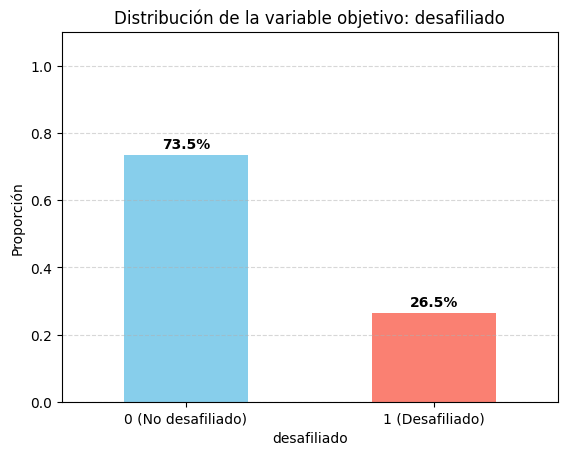

In [ ]:
# Visualización del balance de la variable objetivo
# Calcular proporciones
proporciones = df["desafiliado"].value_counts(normalize=True)

# Crear gráfico
ax = proporciones.plot(kind="bar", color=["skyblue", "salmon"])

# Título y etiquetas
plt.title("Distribución de la variable objetivo: desafiliado")
plt.xticks(ticks=[0, 1], labels=["0 (No desafiliado)", "1 (Desafiliado)"], rotation=0)
plt.ylabel("Proporción")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Añadir porcentajes sobre las barras
for i, valor in enumerate(proporciones):
    plt.text(i, valor + 0.02, f"{valor*100:.1f}%", ha='center', fontsize=10, fontweight='bold')

plt.show()

Una distribución ideal sería más cercana al 50/50, y a partir de un desequilibrio mayor al 70/30, ya se habla de desequilibrio significativo, sobre todo si el modelo puede verse afectado al aprender a predecir solo la clase mayoritaria (por ejemplo, predecir siempre "no" y tener aún así 73% de exactitud).

In [ ]:
#Mostrar valores únicos por cada columna
for col in df.columns:
    print(f"\nColumna: '{col}'")
    print(df[col].unique())


Columna: 'desafiliado'
[0 1]

Columna: 'genero'
['femenino' 'masculino']

Columna: 'persona_mayor'
[0 1]

Columna: 'pareja'
['si' 'no']

Columna: 'dependientes'
['si' 'no']

Columna: 'antiguedad'
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

Columna: 'cliente_nuevo'
[0 1]

Columna: 'cliente_leal'
[0 1]

Columna: 'servicio_telefonico'
['si' 'no']

Columna: 'multiples_lineas'
['no' 'si' 'sin_servicio_telefonico']

Columna: 'servicio_de_internet'
['dsl' 'fibra_optica' 'no']

Columna: 'seguridad_en_linea'
['no' 'si' 'sin_servicio_de_internet']

Columna: 'copia_de_seguridad_en_linea'
['si' 'no' 'sin_servicio_de_internet']

Columna: 'proteccion_de_dispositivos'
['no' 'si' 'sin_servicio_de_internet']

Columna: 'soporte_tecnico'
['si' 'no' 'sin_servicio_de_internet']

Columna: 'television_en_streaming'
['si' 'no' 'si

In [ ]:
# Revisar duplicados antes del split
duplicados_original = df.duplicated().sum()
print(f"Número de filas duplicadas en df antes del split: {duplicados_original}")


Número de filas duplicadas en df antes del split: 45


## 🟦 FASE B: Ingeniería y preparación de datos

FASE B (Pasos 9–15: Ingeniería y preparación de datos)
Objetivo: Dejar un dataset optimizado (limpio, balanceado, sin columnas irrelevantes, sin skew excesivo) para entrenar modelos.

Se ejecuta:

Una sola vez por dataset nuevo o cuando cambian mucho las variables.

Es como preparar la “versión maestra” del dataset con el que vas a trabajar en producción.

ColumnTransformer aquí (opcional):

Puede usarse, pero no queda embebido en el pipeline final.

No se vuelve a ejecutar en cada predicción.

Resumen
Paso 19 ColumnTransformer: Se encarga de imputación, codificación, escalado y transformaciones repetibles que siempre deben aplicarse en entrenamiento y predicción.

Pasos 11–15: Son decisiones únicas basadas en análisis, que modifican la lista de columnas antes de llegar al ColumnTransformer.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   desafiliado                  7043 non-null   int64  
 1   genero                       7043 non-null   object 
 2   persona_mayor                7043 non-null   int64  
 3   pareja                       7043 non-null   object 
 4   dependientes                 7043 non-null   object 
 5   antiguedad                   7043 non-null   int64  
 6   cliente_nuevo                7043 non-null   int64  
 7   cliente_leal                 7043 non-null   int64  
 8   servicio_telefonico          7043 non-null   object 
 9   multiples_lineas             7043 non-null   object 
 10  servicio_de_internet         7043 non-null   object 
 11  seguridad_en_linea           7043 non-null   object 
 12  copia_de_seguridad_en_linea  7043 non-null   object 
 13  proteccion_de_disp

###***9. Codificación de variables categóricas***

In [ ]:
# Paso 9: Codificación de variables categóricas
def codificacion_categoricas(df):
    """
    Codifica variables categóricas binarias y multiclase.
    - Binarias: reemplaza 'no'/'si' y 'femenino'/'masculino' por 0/1
    - Multiclase: usa OneHotEncoding vía pd.get_dummies(drop_first=True)

    Parámetros:
        df (pd.DataFrame): DataFrame original.

    Retorna:
        pd.DataFrame: DataFrame con variables categóricas codificadas.
    """
    df = df.copy()

    # Detectar columnas categóricas
    columnas_categoricas = df.select_dtypes(include='object').columns

    # Normalizar strings para evitar errores en replace
    for col in columnas_categoricas:
        df[col] = df[col].astype(str).str.strip().str.lower()

    # Separar en binarias y multiclase
    binarias = [col for col in columnas_categoricas if df[col].nunique() == 2]
    multiclase = [col for col in columnas_categoricas if df[col].nunique() > 2]

    # Codificar binarias con replace
    if binarias:
        df[binarias] = df[binarias].replace({
            'no': 0, 'si': 1,
            'femenino': 0, 'masculino': 1
        })

    # Codificar multiclase con get_dummies
    if multiclase:
        df = pd.get_dummies(df, columns=multiclase, drop_first=True)

    return df


In [ ]:
df = codificacion_categoricas(df)


/tmp/ipython-input-3421924267.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binarias] = df[binarias].replace({


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   desafiliado                                           7043 non-null   int64  
 1   genero                                                7043 non-null   int64  
 2   persona_mayor                                         7043 non-null   int64  
 3   pareja                                                7043 non-null   int64  
 4   dependientes                                          7043 non-null   int64  
 5   antiguedad                                            7043 non-null   int64  
 6   cliente_nuevo                                         7043 non-null   int64  
 7   cliente_leal                                          7043 non-null   int64  
 8   servicio_telefonico                                   7043

En Python y en pandas, los tipos booleanos (bool) son equivalentes a 0 y 1 al momento de entrenar modelos o realizar operaciones numéricas.
Lo que significa False y True en modelos:
False se interpreta como 0
True se interpreta como 1

In [ ]:
diccionario = df.sample(15).to_dict(orient='list')

print(diccionario)

{'desafiliado': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'genero': [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0], 'persona_mayor': [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], 'pareja': [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0], 'dependientes': [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], 'antiguedad': [21, 2, 13, 71, 26, 2, 24, 39, 4, 65, 72, 45, 65, 7, 27], 'cliente_nuevo': [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], 'cliente_leal': [0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1], 'servicio_telefonico': [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], 'facturacion_electronica': [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1], 'cargo_diario': [3.5, 2.8, 1.4, 3.5, 2.9, 0.6, 1.8, 3.4, 1.7, 3.5, 2.2, 3.9, 2.5, 3.1, 1.9], 'cargo_mensual': [103.8, 84.0, 40.6, 104.1, 85.9, 19.3, 53.6, 101.2, 51.0, 104.3, 66.8, 115.6, 76.2, 94.1, 56.2], 'cargo_total': [2215.0, 134.0, 590.4, 7412.2, 2196.4, 28.3, 1315.4, 3949.2, 207.4, 6725.3, 4758.8, 5125.5, 4929.6, 701.3, 1439.4], 'multiples_line

###***10.	Feature engineering***

Debido a que en el Feture Engineering se van a generar variables irrelevantes que van a generar ruido al modelo, los pasos del 11 al 15 seran usados para filtrar esas variables y optimizar el database

In [ ]:
# Paso 10: Feature engineering (corregido)
def feature_engineering_basico(df):
    df = df.copy()

    # 1. Agrupación de antigüedad (evitar bordes duplicados)
    antiguedad_max = df["antiguedad"].max()
    bins = [0, 12, 36, 72, antiguedad_max + 0.1]  # +0.1 evita duplicado si max=72
    labels = ["Nuevo", "Medio", "Antiguo", "Muy Antiguo"]

    df["antiguedad_grupo"] = pd.cut(
        df["antiguedad"],
        bins=bins,
        labels=labels,
        include_lowest=True
    )

    # 2. Total de servicios contratados (insensible a mayúsculas)
    servicios_cols = [col for col in df.columns if any(x in col.lower() for x in ["servicio", "streaming", "lineas"])]
    if servicios_cols:
        df["total_servicios"] = df[servicios_cols].sum(axis=1).astype(int)

    # 3. Indicador de alto gasto mensual
    df["gasto_alto"] = (df["cargo_mensual"] > df["cargo_mensual"].median()).astype(int)

    # 4. Gasto promedio por mes de antigüedad
    df["gasto_promedio_mes"] = (df["cargo_total"] / df["antiguedad"].replace(0, 1)).astype(float)

    # 5. Cliente premium
    df["cliente_premium"] = ((df["total_servicios"] > df["total_servicios"].median()) &
                             (df["gasto_alto"] == 1)).astype(int)

    # 6. Codificar nuevas categóricas y convertir bool → int
    df = pd.get_dummies(df, columns=["antiguedad_grupo"], drop_first=True)
    bool_cols = df.select_dtypes(include="bool").columns
    df[bool_cols] = df[bool_cols].astype(int)

    return df


In [ ]:
df = feature_engineering_basico(df)
df.head()

,desafiliado,genero,persona_mayor,pareja,dependientes,antiguedad,cliente_nuevo,cliente_leal,servicio_telefonico,facturacion_electronica,...,metodo_de_pago_cheque_por_correo,metodo_de_pago_tarjeta_de_credito_(automatico),metodo_de_pago_transferencia_bancaria_(automatico),total_servicios,gasto_alto,gasto_promedio_mes,cliente_premium,antiguedad_grupo_Medio,antiguedad_grupo_Antiguo,antiguedad_grupo_Muy Antiguo
0,0,0,0,1,1,9,0,0,1,1,...,1,0,0,2,0,65.922222,0,0,0,0
1,0,1,0,0,0,9,0,0,1,0,...,1,0,0,3,0,60.266667,0,0,0,0
2,1,1,0,0,0,4,1,0,1,1,...,0,0,0,2,1,70.200000,0,0,0,0
3,1,1,1,1,0,13,0,0,1,1,...,0,0,0,4,1,95.215385,0,1,0,0
4,1,0,1,1,0,3,1,0,1,1,...,1,0,0,3,1,89.133333,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   desafiliado                                           7043 non-null   int64  
 1   genero                                                7043 non-null   int64  
 2   persona_mayor                                         7043 non-null   int64  
 3   pareja                                                7043 non-null   int64  
 4   dependientes                                          7043 non-null   int64  
 5   antiguedad                                            7043 non-null   int64  
 6   cliente_nuevo                                         7043 non-null   int64  
 7   cliente_leal                                          7043 non-null   int64  
 8   servicio_telefonico                                   7043

In [ ]:
diccionario = df.sample(15).to_dict(orient='list')

print(diccionario)

{'desafiliado': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], 'genero': [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 'persona_mayor': [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0], 'pareja': [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0], 'dependientes': [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 'antiguedad': [21, 2, 69, 17, 61, 56, 22, 13, 1, 35, 2, 61, 16, 72, 69], 'cliente_nuevo': [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 'cliente_leal': [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1], 'servicio_telefonico': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'facturacion_electronica': [0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1], 'cargo_diario': [0.7, 1.5, 2.6, 1.9, 2.3, 3.0, 1.3, 1.4, 0.7, 2.4, 2.6, 3.5, 3.4, 3.7, 3.5], 'cargo_mensual': [20.0, 44.4, 79.2, 56.1, 68.0, 89.7, 40.0, 40.6, 20.0, 73.0, 79.2, 104.0, 100.7, 111.6, 104.0], 'cargo_total': [417.7, 82.7, 5420.6, 947.0, 4158.2, 4953.0, 880.2, 590.4, 20.0, 2471.2, 172.8, 6423.0, 1522.7, 8022.8, 7262.0], 'multiples_lineas_

###***10B: Análisis de correlación y depuración de variables***

***Objetivo***


1. Identificar relaciones fuertes entre variables numéricas (coeficiente > 0.8 o < -0.8), para proporcionar insumos para Paso 15 (Eliminación de variables irrelevantes), evitando duplicidad de información y multicolinealidad que afecte el modelo.

2. Eliminar variables redundantes y variables sin relación significativa con el target para reducir complejidad y evitar ruido antes de entrar a pasos más avanzados (frecuencia, varianza, importancia).

Medir relación con el target → ordenar features según fuerza de correlación con desafiliado para dar contexto en Pasos 11–14.

***📤 Entrada:***

1. df resultante del Paso 10 (Feature Engineering).

***📥 Salida:***

2. Heatmap de correlación global.

3. Lista de pares de variables redundantes (>0.8) para Paso 15.

4. Tabla ordenada de correlación con target desafiliado.

5. Gráfico de barras con Top 15 variables más correlacionadas con el target.

6. df limpio:

  6.1 Sin variables duplicadas o altamente correlacionadas entre sí.

  6.2 Sin variables con correlación irrelevante con el target (desafiliado).

  6.3 Lista de variables eliminadas (impresa en consola).

***La Matriz de correlación post-Feature Engineering*** no solo es útil para Paso 15 (Eliminación de variables redundantes), sino que también te da una ventaja estratégica para analizar Pasos 11–14 porque:

***Cómo aporta a cada paso:***

➡ Paso 11 (Frecuencia dominante)
La matriz te da pistas sobre qué variables pueden estar aportando poco valor porque están muy correlacionadas con otras.

Ejemplo: Si metodo_de_pago_tarjeta_de_credito_(automatico) y metodo_de_pago_transferencia_bancaria_(automatico) tienen correlación alta con la clase (target) y entre sí, en Paso 11 puedes priorizar la que tenga más fuerza explicativa.

➡ Paso 12 (Baja varianza)
Aunque la baja varianza se mide dentro de la propia variable, la correlación con target puede mostrar si, aunque haya baja variabilidad, esa variabilidad mínima está asociada al objetivo (y tal vez convenga conservarla).

➡ Paso 13 (Skewness)
Si una variable con skewness alto está también fuertemente correlacionada con target, puede justificar aplicar transformaciones en lugar de eliminarla, porque aporta información clave al modelo.

➡ Paso 14 (Importancia de variables)
Conocer la correlación con target te da un mapa preliminar de importancia.

Si en Paso 14 una variable sale con baja importancia pero alta correlación con target, hay que investigar si hay multicolinealidad que diluye su importancia en Random Forest.

💡 En pocas palabras:
El Paso 10B te da un mapa general de cómo se comportan las features entre sí y frente al target, lo cual te da mejor criterio para justificar decisiones de retención, transformación o eliminación en Pasos 11–14.

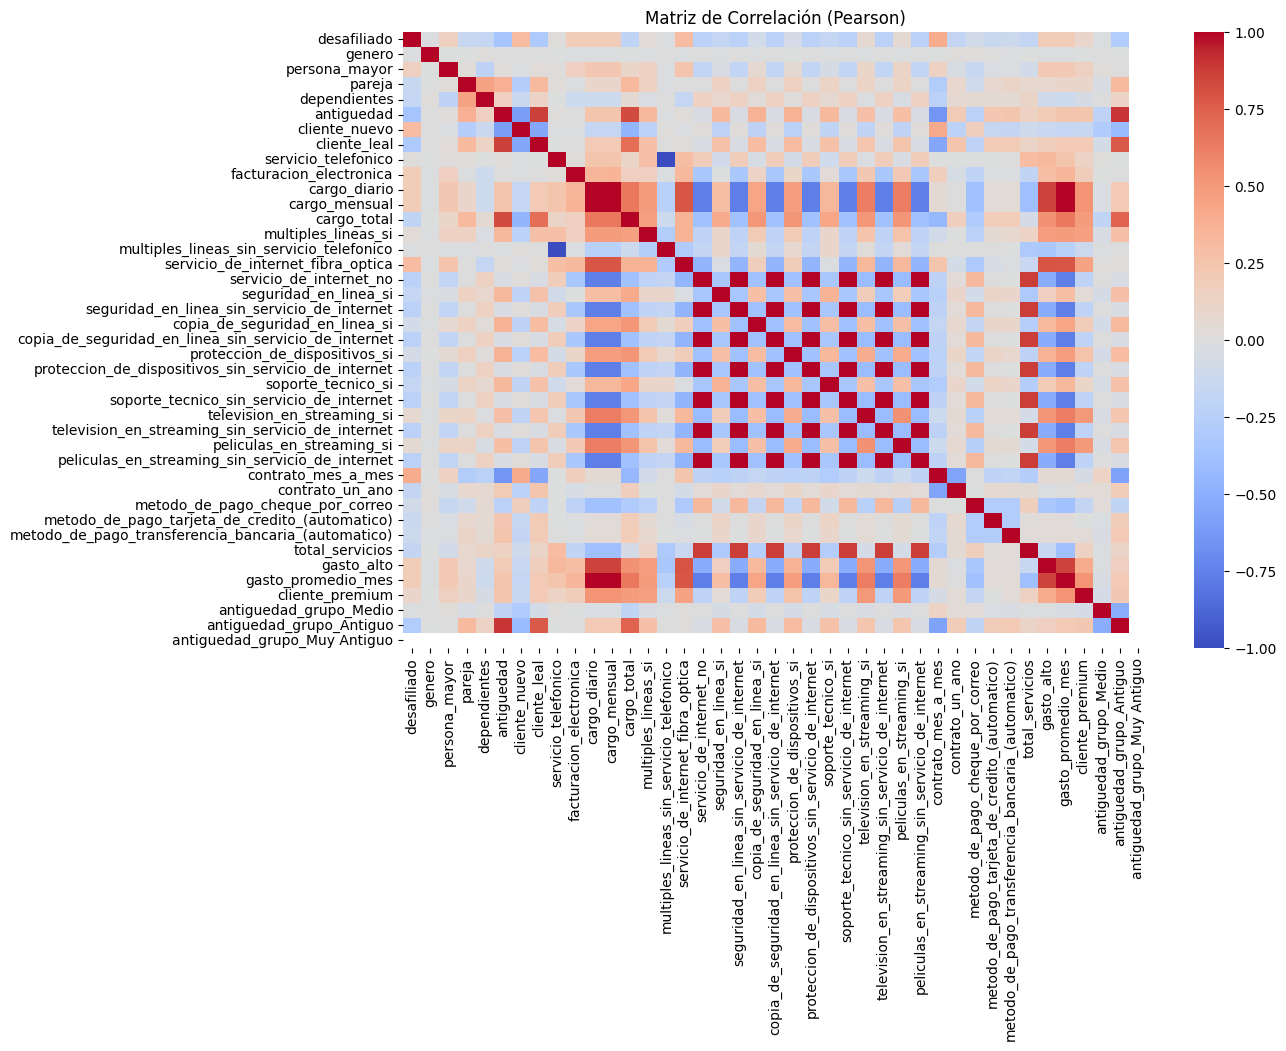

📉 Variables eliminadas por correlación > 0.8: ['cliente_leal', 'cargo_mensual', 'cargo_total', 'multiples_lineas_sin_servicio_telefonico', 'seguridad_en_linea_sin_servicio_de_internet', 'copia_de_seguridad_en_linea_sin_servicio_de_internet', 'proteccion_de_dispositivos_sin_servicio_de_internet', 'soporte_tecnico_sin_servicio_de_internet', 'television_en_streaming_sin_servicio_de_internet', 'peliculas_en_streaming_sin_servicio_de_internet', 'total_servicios', 'gasto_alto', 'gasto_promedio_mes', 'antiguedad_grupo_Antiguo']

✅ Correlación de cada variable con 'desafiliado':
                                             Variable  Correlación_con_Target
0                                  contrato_mes_a_mes                0.405103
1                                          antiguedad               -0.352229
2                                       cliente_nuevo                0.308773
3                   servicio_de_internet_fibra_optica                0.308020
4                             se

/tmp/ipython-input-418282731.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


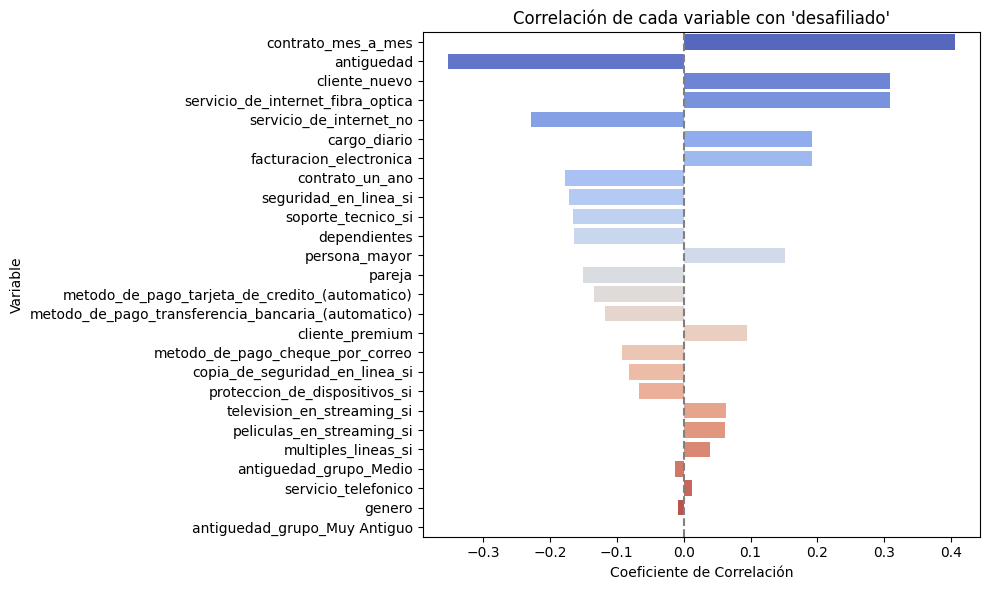

In [ ]:
# 📌 Paso 10B: Matriz de correlación y depuración inicial de variables

# Importamos librerías necesarias
import pandas as pd      # Manejo de dataframes y series
import numpy as np       # Operaciones numéricas y matrices
import matplotlib.pyplot as plt  # Visualización básica
import seaborn as sns    # Visualización avanzada (heatmap, barplot)

# ===================== 1️⃣ Matriz de correlación general =====================

# Calcula la matriz de correlación entre todas las columnas numéricas del DataFrame df
# Método usado: df.corr() → calcula correlación de Pearson por defecto (se puede cambiar con method=)
corr_matrix = df.corr(method='pearson')

# Crea una figura de tamaño 12x8 pulgadas para el gráfico
# Método usado: plt.figure(figsize=(ancho, alto))
plt.figure(figsize=(12, 8))

# Genera un mapa de calor (heatmap) de la matriz de correlación
# Función: sns.heatmap(data, cmap, center) → cmap define la paleta de colores, center=0 centra el color en 0
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)

# Título del gráfico
plt.title("Matriz de Correlación (Pearson)")

# Muestra el gráfico en pantalla
plt.show()

# ===================== 2️⃣ Detección y eliminación de redundantes (>0.8) =====================

# Define el umbral de correlación máxima permitida entre dos variables
umbral_corr = 0.8

# Crea una matriz triangular superior (parte superior de la matriz de correlación) para evitar duplicados
# np.triu crea una matriz triangular superior con 1s, astype(bool) convierte a booleanos
# .where mantiene solo la parte superior de la matriz, el resto se pone como NaN
corr_matrix_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Genera una lista de columnas que tienen correlación alta con alguna otra (> umbral_corr)
# any() verifica si existe alguna correlación en esa columna que supere el umbral
to_drop_corr = [column for column in corr_matrix_upper.columns if any(corr_matrix_upper[column].abs() > umbral_corr)]

# Imprime las variables que se eliminarán por alta correlación
print(f"📉 Variables eliminadas por correlación > {umbral_corr}: {to_drop_corr}")

# Elimina del DataFrame las columnas redundantes
# Método usado: df.drop(columns=lista, inplace=True)
df.drop(columns=to_drop_corr, inplace=True)

# ===================== 3️⃣ Correlación con variable objetivo =====================

# Nombre de la variable objetivo
target = "desafiliado"

# Calcula la correlación de cada variable con el target y elimina el propio target
# df.corr()[target] → devuelve la correlación de todas las columnas con la columna 'target'
# .drop(target) → elimina la fila correspondiente al target
# .sort_values(key=abs, ascending=False) → ordena por valor absoluto de la correlación
correlaciones_target = df.corr()[target].drop(target).sort_values(key=abs, ascending=False)

# Crea un DataFrame con dos columnas: nombre de la variable y su correlación con el target
df_corr_target = pd.DataFrame({
    "Variable": correlaciones_target.index,
    "Correlación_con_Target": correlaciones_target.values
})

# Imprime tabla de correlaciones con el target
print("\n✅ Correlación de cada variable con 'desafiliado':")
print(df_corr_target)

# ===================== 4️⃣ Eliminación de variables con baja correlación con target (<0.1) =====================

# Umbral mínimo de correlación absoluta para mantener la variable
umbral_target = 0.1

# Genera lista de variables con correlación absoluta menor al umbral
# .loc[] → filtra filas que cumplan condición
# .tolist() → convierte la Serie en lista
to_drop_target = df_corr_target.loc[df_corr_target["Correlación_con_Target"].abs() < umbral_target, "Variable"].tolist()

# Imprime las variables eliminadas por baja correlación con target
print(f"\n📉 Variables eliminadas por baja correlación con target (|r| < {umbral_target}): {to_drop_target}")

# Elimina las variables de baja correlación
df.drop(columns=to_drop_target, inplace=True)

# Imprime la forma final (n_filas, n_columnas) del DataFrame después del filtrado
print(f"\n✅ Shape final de df después de Paso 10B: {df.shape}")

# ===================== 5️⃣ Visualización de correlación con target =====================

# Crea una figura de 10x6 pulgadas
plt.figure(figsize=(10, 6))

# Grafica un barplot con seaborn donde:
# x → correlación con el target
# y → nombre de la variable
# data → df ordenado por valor absoluto de correlación
# palette → define colores según la correlación
sns.barplot(
    x="Correlación_con_Target",
    y="Variable",
    data=df_corr_target.sort_values("Correlación_con_Target", key=abs, ascending=False),
    palette="coolwarm"
)

# Línea vertical en x=0 para separar correlaciones positivas y negativas
plt.axvline(x=0, color='gray', linestyle='--')

# Título y etiquetas de ejes
plt.title("Correlación de cada variable con 'desafiliado'")
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Variable")

# Ajusta automáticamente los elementos del gráfico para que no se solapen
plt.tight_layout()

# Muestra el gráfico final
plt.show()


***Análisis de resultados***

1️⃣ Variables eliminadas por alta correlación (>0.8)
Se eliminaron 14 variables que eran redundantes porque tenían correlación casi perfecta con otras (ej. cargo_mensual vs cargo_total, gasto_promedio_mes, etc.).

Esto es positivo porque:

Evita multicolinealidad que puede distorsionar la importancia de variables en modelos como Random Forest y afectar la estabilidad.

Reduce dimensionalidad → menos variables, menor riesgo de sobreajuste, procesamiento más rápido.

Ejemplos clave:

cliente_leal estaba fuertemente correlacionada con antiguedad y contrato_mes_a_mes.

Variables de servicios “sin internet” (seguridad_en_linea_sin_servicio_de_internet, etc.) tenían correlación 1.0 entre sí → mantener una sola representa la información completa.

2️⃣ Correlación con la variable objetivo (desafiliado)
Variables más correlacionadas positivamente (mayor probabilidad de desafiliación):

contrato_mes_a_mes (r = 0.405) → fuerte indicador de riesgo.

cliente_nuevo (r = 0.308) → clientes nuevos más propensos a desafiliarse.

servicio_de_internet_fibra_optica (r = 0.308) → posible efecto de problemas técnicos o tarifas.

Variables más correlacionadas negativamente (menor probabilidad de desafiliación):

antiguedad (r = -0.352) → clientes antiguos tienden a permanecer.

contrato_un_ano (r = -0.178) y soporte_tecnico_si (r = -0.165) → contratos más largos y soporte disminuyen el riesgo.

3️⃣ Variables eliminadas por baja correlación con target (|r| < 0.1)
Se eliminaron 10 variables por no mostrar relación significativa con desafiliado.

Ejemplos:

genero, servicio_telefonico, multiples_lineas_si → no aportan información útil para predecir la desafiliación.

Variables como cliente_premium y metodo_de_pago_cheque_por_correo tienen correlación muy baja → bajo poder predictivo.

Esto mejora la simplicidad y generalización del modelo, manteniendo solo variables con relevancia real.

4️⃣ Shape final
***De 41 variables iniciales → 17 variables finales después de Paso 10B.***

***Esto implica que ~58% de las variables fueron descartadas por redundancia o baja relación con el target.***

***Menor complejidad → más interpretabilidad, menor riesgo de sobreajuste, mejor velocidad de entrenamiento.***

***Conclusión***

1. Se logró una depuración fuerte y efectiva:

2. Eliminación de variables redundantes → reduce multicolinealidad.

3. Eliminación de variables con baja correlación con target → mayor enfoque en señales útiles.

***Impacto en negocio:***

1. Las variables con mayor correlación positiva (contrato_mes_a_mes, cliente_nuevo, fibra óptica) son focos claros para estrategias de retención.

2. Las variables con correlación negativa (antiguedad, contrato_un_ano) pueden ser palancas para diseñar planes de fidelización.

3. El dataset ahora está optimizado para eficiencia y precisión en pasos posteriores (Paso 11, 12, 13, etc.).

###***11. Análisis de frecuencia dominante***

***1. Objetivo del código:***

Este paso busca identificar y eliminar variables poco informativas porque están dominadas por un solo valor en la mayoría de sus registros (frecuencia dominante).

Además, si son numéricas, se evalúa si su correlación con la variable objetivo (desafiliado) es muy baja; en ese caso, también se eliminan.
Así, se evita que variables con escasa variabilidad o poca relación con el target contaminen el modelo.

***2. Entradas para la construcción del código:***

df → DataFrame de trabajo después del Paso 10B (sin variables redundantes ni de baja correlación).

umbral_frecuencia → valor límite para considerar que una categoría o valor es dominante (en este caso 0.95 = 95% de las observaciones tienen el mismo valor).

umbral_correlacion → valor mínimo de correlación absoluta que debe tener una variable numérica dominante para mantenerse.

Variable objetivo → 'desafiliado', usada para calcular la correlación.

***3. Salidas que da el código:***

Lista columnas_dominantes → columnas que cumplen el criterio de frecuencia dominante.

Lista columnas_a_eliminar → columnas que además serán eliminadas por baja correlación o por ser categóricas dominantes.

***Mensajes en consola con:***

Variables dominantes y su frecuencia.

Correlación (si es numérica).

Decisión de eliminar o no.

DataFrame df actualizado sin las columnas marcadas para eliminar.

In [ ]:
# Paso 11: Análisis de frecuencia dominante

umbral_frecuencia = 0.95   # Valor límite (95%) para considerar un valor como dominante en una columna
umbral_correlacion = 0.05  # Mínima correlación absoluta para conservar una variable numérica dominante

df_temp = df.copy()  # Crea una copia del DataFrame principal para no modificarlo durante el análisis
columnas_dominantes = []  # Lista para almacenar las columnas que son dominadas por un valor
columnas_a_eliminar = []  # Lista para almacenar las columnas que serán eliminadas

for col in df_temp.columns:  # Itera sobre todas las columnas del DataFrame
    if col == 'desafiliado':  # Si la columna es la variable objetivo...
        continue  # ...se salta porque no se analiza

    # Calcula la frecuencia relativa del valor más común en la columna
    # .value_counts(normalize=True) → cuenta y divide por total
    # .max() → obtiene la frecuencia máxima
    valor_max = df_temp[col].value_counts(normalize=True).max()

    if valor_max > umbral_frecuencia:  # Si supera el 95% (dominante)
        columnas_dominantes.append(col)  # Guarda la columna en lista de dominantes

        # Verifica si el tipo de dato es numérico usando pd.api.types.is_numeric_dtype()
        if pd.api.types.is_numeric_dtype(df_temp[col]):
            # Calcula correlación absoluta con el target usando Series.corr()
            correlacion = abs(df_temp[col].corr(df_temp['desafiliado']))

            # Imprime columna, frecuencia dominante y correlación
            print(f"{col}: {valor_max:.2%} dominante, correlación = {correlacion:.4f}")

            # Si la correlación es menor al umbral, se marca para eliminar
            if correlacion < umbral_correlacion:
                columnas_a_eliminar.append(col)
        else:
            # Si no es numérica, se marca para eliminar directamente
            print(f"{col}: {valor_max:.2%} dominante, tipo no numérico, marcada para eliminar")
            columnas_a_eliminar.append(col)

# Imprime lista de columnas dominantes detectadas
print("\nColumnas con frecuencia dominante :", columnas_dominantes)

# Imprime lista de columnas que serán eliminadas
print("\nColumnas a eliminar:", columnas_a_eliminar)

# Elimina del DataFrame original las columnas marcadas
# df.drop(columns=lista, inplace=True) → elimina columnas en el mismo DataFrame
df.drop(columns=columnas_a_eliminar, inplace=True)


antiguedad_grupo_Muy Antiguo: 100.00% dominante, correlación = nan

Columnas con frecuencia dominante : ['antiguedad_grupo_Muy Antiguo']

Columnas a eliminar: []


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


***1. Análisis de resultados:***

Se detectó solo una variable dominante: antiguedad_grupo_Muy Antiguo, con el 100% de los registros en un único valor.

La correlación resultó en NaN porque no existe variabilidad en la columna (al ser todos los valores iguales, la desviación estándar es cero, y la fórmula de correlación no puede calcularse).

A pesar de ser dominante, no se eliminó porque el código actual únicamente elimina variables dominantes numéricas con baja correlación o categóricas dominantes, y en este caso parece que la lógica no cubrió el caso NaN.

***2. Conclusión:***

antiguedad_grupo_Muy Antiguo no aporta información útil para el modelo, ya que es constante en toda la muestra.

Aunque el código no la eliminó, desde un punto de vista de limpieza de datos debería ser eliminada manualmente, porque no contribuirá a la predicción y solo agregará ruido y dimensionalidad innecesaria.

El resultado confirma que en este dataset no hay un problema masivo de variables dominantes, solo un caso puntual.



###***12	Análisis de baja varianza***


***1. Objetivo del código:***

Este paso busca identificar y eliminar variables con muy poca variabilidad (baja varianza), ya que aportan poca o ninguna información al modelo.

Además, antes de eliminarlas, se revisa si tienen alguna correlación significativa con la variable objetivo para evitar descartar variables que, aunque con poca variación, sí sean predictivas.

***2. Entradas para la construcción del código:***

df → DataFrame con las variables independientes y la variable objetivo "desafiliado".

Umbral de varianza (threshold=0.01) → Define qué tan baja debe ser la varianza para marcar una variable como candidata a eliminar.

Umbral de correlación (umbral_correlacion=0.05) → Define el mínimo valor de correlación con el objetivo para conservar la variable.

***3. Salidas que da el código para los próximos pasos:***

Lista columnas_baja_varianza → Variables detectadas con poca variabilidad.

Lista columnas_a_eliminar → Variables efectivamente eliminadas por tener baja varianza y baja correlación con el objetivo.

DataFrame df actualizado → Sin las variables eliminadas, preparado para los siguientes pasos de preprocesamiento o modelado.



In [ ]:
# Paso 12: Análisis de baja varianza
from sklearn.feature_selection import VarianceThreshold  # 📦 Importa el selector de características por varianza de scikit-learn

X = df.drop(columns=["desafiliado"])  # 📄 Crea un DataFrame solo con variables predictoras eliminando la variable objetivo
y = df["desafiliado"]  # 📄 Extrae la variable objetivo como Serie para análisis posterior

selector = VarianceThreshold(threshold=0.01)  # ⚙️ Inicializa el selector para marcar variables con varianza menor al 1%
selector.fit(X)  # ▶️ Aplica el cálculo de varianza a las columnas de X

columnas_baja_varianza = X.columns[~selector.get_support()]  # 🔍 Obtiene los nombres de columnas que NO pasan el umbral de varianza
print("Columnas detectadas con baja varianza:", list(columnas_baja_varianza))  # 🖨️ Muestra las variables candidatas a eliminar

umbral_correlacion = 0.05  # 📏 Define el mínimo valor absoluto de correlación con el objetivo para conservar una variable
columnas_a_eliminar = []  # 🗑️ Inicializa la lista que almacenará las variables que se eliminarán finalmente

for col in columnas_baja_varianza:  # 🔄 Itera sobre cada variable con baja varianza detectada
    if pd.api.types.is_numeric_dtype(df[col]):  # ✅ Verifica si la variable es numérica (para poder calcular correlación)
        corr = abs(df[col].corr(y))  # 📊 Calcula la correlación absoluta entre la variable y la variable objetivo
        print(f"{col}: correlación con objetivo = {corr:.3f}")  # 🖨️ Muestra la correlación encontrada
        if corr < umbral_correlacion:  # 📏 Si la correlación es menor al umbral definido...
            columnas_a_eliminar.append(col)  # 🗑️ ...la añade a la lista de eliminación

print("\nColumnas a eliminar:", columnas_a_eliminar)  # 🖨️ Muestra las variables que efectivamente se eliminarán

df.drop(columns=columnas_a_eliminar, inplace=True)  # ✂️ Elimina las variables seleccionadas del DataFrame principal


Columnas detectadas con baja varianza: ['antiguedad_grupo_Muy Antiguo']
antiguedad_grupo_Muy Antiguo: correlación con objetivo = nan

Columnas a eliminar: []


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


***1. Análisis de resultados obtenidos:***

Se detectó solo una variable con baja varianza: antiguedad_grupo_Muy Antiguo.

La correlación calculada con el objetivo fue NaN, lo que sucede cuando la variable es constante (varianza = 0).

No se eliminó porque el código actual exige que la correlación sea menor al umbral, pero en este caso NaN no cumple esa condición de forma explícita.

Esto deja en el DataFrame una variable que es totalmente constante y que no aporta valor predictivo.

***2. Conclusión:***

antiguedad_grupo_Muy Antiguo es redundante y debería ser eliminada, ya que no aporta información al modelo y podría incluso causar problemas en algunas métricas o algoritmos.

El código podría mejorarse para que también elimine variables con correlación NaN automáticamente, tratándolas como no predictivas.

###***13	Análisis de skewness***

***1. Obejtivo:***

El análisis de skewness sirve para detectar asimetría alta en variables numéricas, el skew alto indica concentración de valores a un lado de la media, esto ayuda a reducir el impacto de valores extremos, para mejorar la estabilidad general del modelo RandomForest, por lo que se debera aplicar transformaciones (log1p, sqrt, Box-Cox, etc.) para que la distribución sea más simétrica. Aunque RandomForest puede trabajar con datos sin transformar, aplicar tratamiento de skewness mejora la calidad de los splits, ya que los los outliers extremos pueden distorsionar splits porlo que se reduce la sensibilidad a valores extremos y puede estabilizar resultados. Adicionalmente, se mejora la uniformidad en escalas, ayudando a que variables importantes no queden “opacadas” por valores atípicos. Y finalmente, se facilita la interpretabilidad y el análisis de importancia de variables.

Variables a las que no es necesario realizar un analisis skewness:

1. Variables binarias (0 y 1):

Ejemplo: cliente_nuevo, cliente_leal, servicio_telefonico, persona_mayor, cliente_premium, etc.
Estas generan skewness alto porque la distribución es muy asimétrica (la mayoría son 0 o 1).
👉 No necesitan transformación, porque log1p(0) y log1p(1) producen valores que no cambian la forma de la variable (solo la escalan sin sentido).

2. Variables booleanas (True/False):

Ejemplo: multiples_lineas_si, contrato_mes_a_mes, metodo_de_pago_cheque_por_correo…
Estas son esencialmente binarias codificadas como booleanos. Tampoco se transforman.

Variables a las que si es necesario realizar un analisis skewness:

1. Variables continuas reales:

Ejemplo: cargo_diario, cargo_mensual, cargo_total, gasto_promedio_mes, antiguedad, estas variables sí pueden tener valores extremos y por eso es donde analizamos el skewness y aplicamos transformaciones (log1p, sqrt) si es necesario.

***2. Entradas para la construcción del código:***

df: DataFrame con las variables de entrada y la variable objetivo.

Columnas continuas de interés: "cargo_diario", "cargo_mensual", "cargo_total", "gasto_promedio_mes", "antiguedad" (solo si existen en el DataFrame).

umbral_skew (por defecto 1): límite absoluto de skewness a partir del cual se considera aplicar una transformación.

***3. Salidas del código para los próximos pasos:***

DataFrame corregido (df): el mismo DataFrame, pero con las columnas continuas transformadas si tenían skewness alto.

Comparacion_skew: tabla comparativa que muestra el valor de skewness antes y después de la transformación, útil para validar si la corrección fue efectiva.

In [ ]:
# Paso 13: Análisis de skewness
from scipy.stats import skew  # 📦 Importa la función skew para medir asimetría de distribuciones
import numpy as np  # 📦 Importa NumPy para cálculos numéricos y transformaciones

def corregir_skewness(df, umbral_skew=1):  # 🛠️ Define función que corrige skewness si excede un umbral
    df = df.copy()  # 📄 Crea una copia del DataFrame para no modificar el original directamente

    # 📋 Lista de columnas continuas a evaluar, filtrando solo las que existen en df
    continuas = [col for col in ["cargo_diario", "cargo_mensual", "cargo_total",
                                 "gasto_promedio_mes", "antiguedad"] if col in df.columns]

    # 📊 Calcula skewness para cada columna continua (ignorando valores nulos)
    skew_antes = df[continuas].apply(lambda x: skew(x.dropna()))

    for col in continuas:  # 🔄 Recorre cada columna continua
        if abs(skew_antes[col]) > umbral_skew:  # 📏 Si la asimetría absoluta supera el umbral...
            if df[col].min() > 0:  # ✅ Si todos los valores son positivos
                df[col] = np.log1p(df[col])  # 🔹 Aplica logaritmo natural con desplazamiento (+1)
            elif df[col].min() == 0:  # ✅ Si el valor mínimo es cero
                df[col] = np.log1p(df[col] + 1e-6)  # 🔹 Aplica logaritmo con un pequeño desplazamiento para evitar log(0)
            else:  # ✅ Si hay valores negativos
                df[col] = np.sqrt(np.abs(df[col]))  # 🔹 Aplica raíz cuadrada del valor absoluto

    return df  # 📤 Retorna DataFrame corregido

# Aplicar corrección
df = corregir_skewness(df)  # ▶️ Ejecuta la función sobre el DataFrame principal

from scipy.stats import skew  # 📦 Reimporta skew (redundante en este caso)
import pandas as pd  # 📦 Importa pandas para manejo de DataFrames

# 🔹 Paso 13B: Validación manual de skewness
# 📋 Lista de columnas continuas, filtrando solo las que existen en df
continuas = [col for col in ["cargo_diario", "cargo_mensual", "cargo_total",
                             "gasto_promedio_mes", "antiguedad"] if col in df.columns]

# 📊 Calcula skewness antes de aplicar corrección (evitando NaNs)
skew_antes = df[continuas].apply(lambda x: skew(x.dropna()))
skew_df_antes = pd.DataFrame(skew_antes, columns=["skewness_antes"])  # 📄 Convierte en DataFrame

# 📊 Calcula skewness después de aplicar corrección (en DataFrame temporal)
df_temp = corregir_skewness(df)  # 📄 Aplica corrección a copia temporal
skew_despues = df_temp[continuas].apply(lambda x: skew(x.dropna()))
skew_df_despues = pd.DataFrame(skew_despues, columns=["skewness_despues"])  # 📄 Convierte en DataFrame

# 📊 Combina resultados antes y después en una sola tabla comparativa
comparacion_skew = pd.concat([skew_df_antes, skew_df_despues], axis=1)

print("📊 Comparación de skewness antes y después de la transformación:")  # 🖨️ Mensaje descriptivo
print(comparacion_skew)  # 🖨️ Muestra la tabla comparativa


📊 Comparación de skewness antes y después de la transformación:
              skewness_antes  skewness_despues
cargo_diario       -0.213043         -0.213043
antiguedad          0.239489          0.239489


***4. Análisis de los resultados obtenidos
Resultados:***

Ambas variables (cargo_diario y antiguedad) presentan skewness bajo en valor absoluto (< 1), por lo que no se aplicó ninguna transformación.

Los valores de skewness antes y después son idénticos, lo que confirma que el código fue correctamente diseñado para evitar cambios innecesarios.

***5. Conclusión:***

En este caso, el análisis de skewness no produjo modificaciones en los datos, ya que las variables continuas relevantes ya tenían distribuciones razonablemente simétricas.

Esto significa que no se introduce ningún cambio que afecte el modelado y podemos continuar con el flujo de preprocesamiento sin riesgos de distorsionar la información.



###***14. Evaluación de importancia de variables***

***1. Objetivo del código:***

El objetivo del Paso 14 es identificar cuáles variables tienen mayor relevancia para predecir la variable objetivo (desafiliado) usando un modelo de Random Forest. Esto permite priorizar las variables más influyentes para el modelado y descartar las menos relevantes si se busca simplificación.

***2. Entradas para la construcción del código:***

DataFrame df ya procesado, que contiene:

Variables predictoras (numéricas y categóricas transformadas en numéricas).

Variable objetivo desafiliado.

Parámetros del modelo:

n_estimators=200: cantidad de árboles en el bosque aleatorio.

random_state=42: reproducibilidad.

n_jobs=-1: usar todos los núcleos para acelerar.

Librerías: sklearn, matplotlib, seaborn, pandas.

***3. Salidas del código para los próximos pasos:***

Tabla ordenada con las variables y su importancia.

Gráfico con las 15 variables más importantes.

Esta información se podrá usar en:

Reducción de dimensionalidad.

Interpretabilidad del modelo.

Priorización de variables clave para el negocio.

📊 Ranking de importancia de variables:
                                             Variable  Importancia
3                                          antiguedad     0.327093
6                                        cargo_diario     0.228346
11                                 contrato_mes_a_mes     0.087102
7                   servicio_de_internet_fibra_optica     0.050151
4                                       cliente_nuevo     0.039173
1                                              pareja     0.034383
5                             facturacion_electronica     0.033354
9                               seguridad_en_linea_si     0.030966
10                                 soporte_tecnico_si     0.029521
0                                       persona_mayor     0.027942
2                                        dependientes     0.027163
14  metodo_de_pago_transferencia_bancaria_(automat...     0.025562
13     metodo_de_pago_tarjeta_de_credito_(automatico)     0.025272
8                      

/tmp/ipython-input-1266465882.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia.head(15), x="Importancia", y="Variable", palette="viridis")


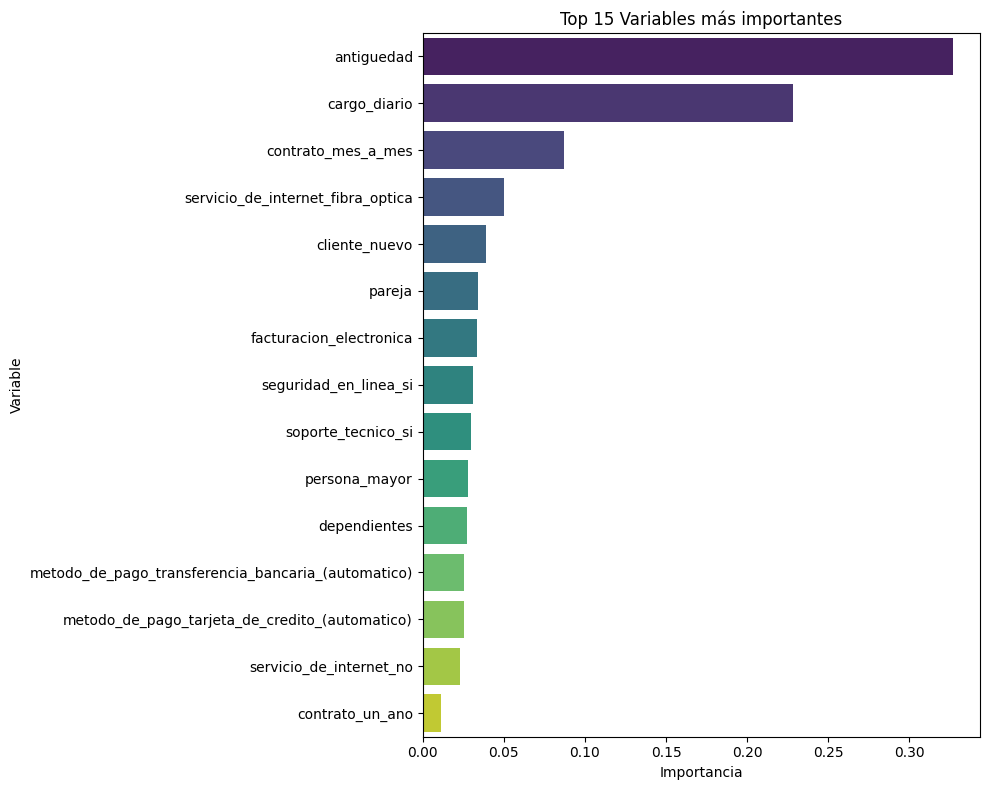

In [ ]:
# Paso 14: Importancia de variables
from sklearn.ensemble import RandomForestClassifier  # Importa el modelo de Random Forest de sklearn (clase)
import matplotlib.pyplot as plt  # Importa la librería para graficar
import seaborn as sns  # Librería para visualizaciones más estéticas

X = df.drop("desafiliado", axis=1)  # Método .drop() para eliminar la columna objetivo del conjunto de predictores
y = df["desafiliado"]  # Selección de la columna objetivo usando acceso por nombre de columna (atributo Series)

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
# Crea el modelo Random Forest (clase), configurando cantidad de árboles, semilla y uso de todos los núcleos

rf.fit(X, y)  # Método .fit() para entrenar el modelo con las variables X y objetivo y

importancia = pd.DataFrame({
    "Variable": X.columns,  # Atributo .columns para obtener nombres de las variables
    "Importancia": rf.feature_importances_  # Atributo del modelo que devuelve importancia de cada variable
}).sort_values(by="Importancia", ascending=False)
# Crea un DataFrame y lo ordena (método .sort_values()) de mayor a menor importancia

print("📊 Ranking de importancia de variables:")  # Muestra texto explicativo
print(importancia)  # Imprime el DataFrame con las importancias

plt.figure(figsize=(10, 8))  # Crea una figura con tamaño personalizado
sns.barplot(data=importancia.head(15), x="Importancia", y="Variable", palette="viridis")
# Método .barplot() de Seaborn para graficar las 15 variables más importantes
plt.title("Top 15 Variables más importantes")  # Establece el título del gráfico
plt.tight_layout()  # Ajusta el diseño para evitar recortes
plt.show()  # Muestra el gráfico en pantalla


***1. Análisis de los resultados obtenidos:***

Variables más importantes:

antiguedad (32.7%) — Principal factor predictivo.

cargo_diario (22.8%) — Relacionado al consumo o facturación.

contrato_mes_a_mes (8.7%) — Indica flexibilidad en el compromiso del cliente.

Las últimas posiciones incluyen variables con importancia casi nula, como antiguedad_grupo_Muy Antiguo (0.0%), que probablemente es irrelevante para el modelo.

El patrón sugiere que tanto factores económicos como tiempo de permanencia son críticos para explicar la desafiliación.

***2. Conclusión:***

El modelo de Random Forest muestra que pocas variables concentran la mayoría de la importancia predictiva.

Esto permitirá optimizar el modelo eliminando variables con importancia muy baja y concentrarse en las más influyentes, mejorando interpretabilidad y potencialmente reduciendo sobreajuste.

***1. Impacto en negocio:***

El hecho de que antigüedad y monto facturado sean los principales factores sugiere que clientes recientes o con bajo gasto requieren estrategias específicas de retención.

El tipo de contrato (mes_a_mes) también es un factor relevante, lo que indica que los contratos más flexibles pueden representar mayor riesgo de baja.



####***14.1: Análisis gráfico de distribución de variables relevantes respecto a la variable objetivo***

Investigar cómo las variables con mayor importancia en relación con la variable objetivo se distribuyen.

***1. Distribución de antiguedad según desafiliado***

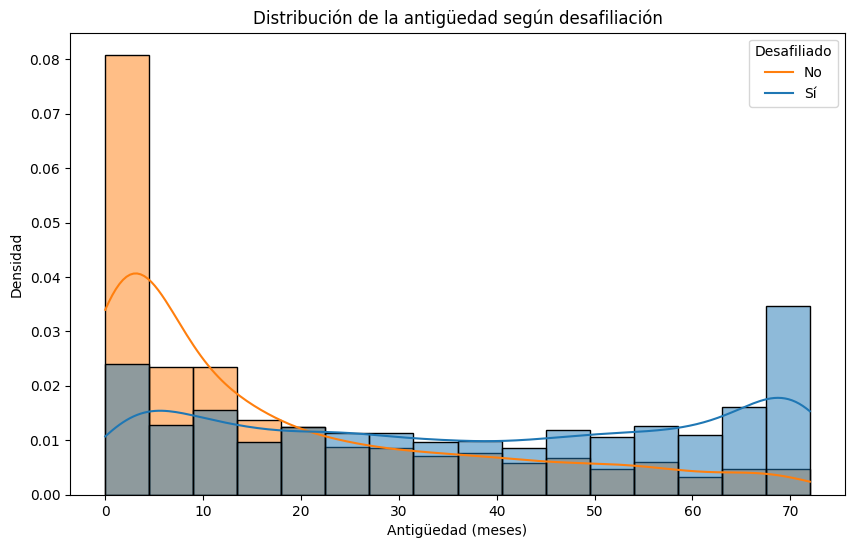

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='antiguedad', hue='desafiliado', kde=True, stat='density', common_norm=False)
plt.title('Distribución de la antigüedad según desafiliación')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Densidad')
plt.legend(title='Desafiliado', labels=['No', 'Sí'])
plt.show()


***Observaciones:***

1. Clientes no desafiliados (naranja) tienen una mayor concentración en antigüedades bajas (0-5 meses), con una caída progresiva.

2. Clientes desafiliados (azul) también tienen presencia en bajas antigüedades, pero tienen un segundo pico claro en los 70 meses, lo que indica una distribución bimodal.

3. Ambos grupos están normalizados (con stat="density"), por lo que las curvas representan proporciones relativas internas a cada clase, no cantidades absolutas.

***Interpretación:***

Hay un grupo importante de clientes nuevos que aún no se han desafiliado (esperable).

Sin embargo, la alta densidad de desafiliados en antigüedad alta (~70 meses) podría indicar:

Fin de contrato a largo plazo.

Ciclo de vida del cliente cumplido.

El comportamiento bimodal de los desafiliados sugiere dos perfiles distintos de clientes que se desafilian: muy nuevos y muy antiguos.

***2. Distribución de cargo_diario según desafiliado***

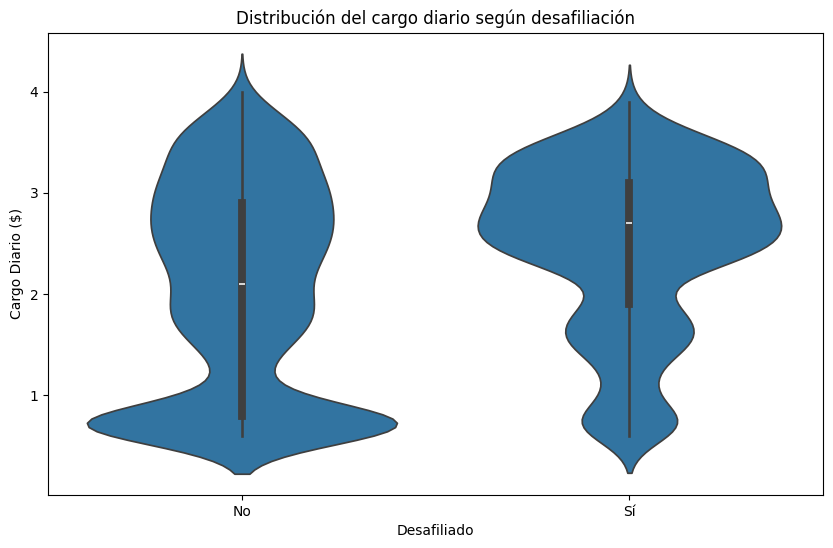

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='desafiliado', y='cargo_diario', inner='box')
plt.title('Distribución del cargo diario según desafiliación')
plt.xlabel('Desafiliado')
plt.ylabel('Cargo Diario ($)')
plt.xticks([0,1], ['No', 'Sí'])
plt.show()


***Observaciones:***

1. Ambos grupos tienen una forma similar, pero:

2. El grupo de desafiliados tiene una distribución más ancha y uniforme, especialmente entre $2 y $3.

3. La mediana (línea blanca) en los desafiliados está ligeramente más alta que en los no desafiliados.

4. Hay mayor densidad de valores altos en los desafiliados.

***Interpretación:***

1. Los clientes que pagan cargos diarios más altos tienen más probabilidades de desafiliarse.

2. Puede indicar que:

3. El precio podría estar relacionado con la decisión de desafiliación.

4. Clientes con cargos más altos podrían tener mayores expectativas o menor tolerancia a problemas.

5. También hay una concentración baja (~$1) en ambos grupos, lo que sugiere un grupo económico que tiende a mantenerse.

***3. Proporción de desafiliados por tipo de contrato contrato_mes_a_mes***

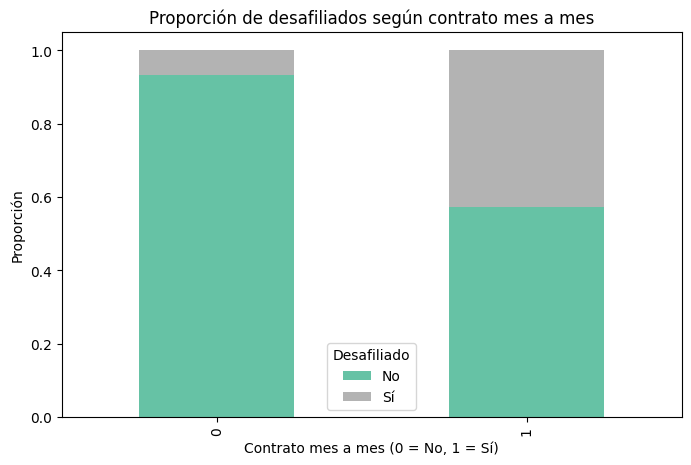

In [ ]:
import pandas as pd

# Proporciones por tipo de contrato
contrato_prop = pd.crosstab(df['contrato_mes_a_mes'], df['desafiliado'], normalize='index')

# Gráfico
contrato_prop.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title('Proporción de desafiliados según contrato mes a mes')
plt.xlabel('Contrato mes a mes (0 = No, 1 = Sí)')
plt.ylabel('Proporción')
plt.legend(title='Desafiliado', labels=['No', 'Sí'])
plt.show()


***Observaciones:***

1. Los clientes con contrato mes a mes (1) tienen una proporción mucho más alta de desafiliación (~43%).

2. En cambio, los clientes sin contrato mes a mes (0) tienen una tasa de desafiliación baja (~6%).

***Interpretación:***

1. Este es el factor más determinante entre los tres.

2. Contratos mes a mes otorgan mayor libertad de salida, y por ende, mayor desafiliación.

3. Los contratos más rígidos (anuales, bianuales) reducen la tasa de desafiliación, probablemente por barreras contractuales o penalizaciones.

###***15. Eliminación de variables irrelevantes***

***Objetivo del código:***

Eliminar del DataFrame aquellas variables cuya importancia predictiva (calculada en el paso anterior) sea menor al umbral definido (en este caso, 1%).
Esto optimiza el modelo reduciendo complejidad y posibles ruidos en los datos.

***Entradas para la construcción del código:***

DataFrame df ya procesado y sin la variable objetivo eliminada en pasos anteriores.

DataFrame importancia generado en el Paso 14 con columnas:

"Variable": nombre de la variable predictora.

"Importancia": peso asignado por el modelo Random Forest.

Parámetro:

umbral_importancia = 0.01 (1%) para decidir qué variables eliminar.

***Salidas que da el código para los próximos pasos:***

Lista de variables que se eliminaron por baja importancia.

Nuevo df reducido, con menos columnas, listo para el modelado final.

Dimensiones finales del conjunto de datos.

In [ ]:
# Paso 15: Eliminación de variables irrelevantes
umbral_importancia = 0.01
# Asigna un valor umbral (1%) para considerar que una variable es poco importante

variables_baja_importancia = importancia[importancia["Importancia"] < umbral_importancia]["Variable"].tolist()
# Filtra las filas del DataFrame 'importancia' con importancia menor al umbral
# Luego selecciona la columna 'Variable' y la convierte a lista (método .tolist())

print(f"📉 Variables con importancia < {umbral_importancia*100:.0f}%:", variables_baja_importancia)
# Imprime el listado de variables con baja importancia, usando f-string para formato

df.drop(columns=variables_baja_importancia, inplace=True)
# Elimina las columnas identificadas como irrelevantes del DataFrame 'df'
# Método .drop(), parámetro inplace=True para que la eliminación sea permanente

print(f"\nShape final de df: {df.shape}")
# Imprime las dimensiones del DataFrame después de eliminar variables (atributo .shape)


📉 Variables con importancia < 1%: ['antiguedad_grupo_Muy Antiguo']

Shape final de df: (7043, 16)


***Análisis de los resultados obtenidos***

Solo una variable (antiguedad_grupo_Muy Antiguo) fue detectada con importancia menor al 1%.

Se eliminó esta variable del DataFrame, pasando de 17 a 16 columnas (manteniendo 7043 filas).

Esto indica que la mayoría de variables aportan valor predictivo al modelo.

***Conclusión***

La depuración de variables fue mínima, lo que confirma que el conjunto de datos está bien definido y la selección previa ya había eliminado atributos irrelevantes.

###***16	Separación de datos***

***Objetivo del código***

Separar el conjunto de datos en train (entrenamiento) y test (evaluación) asegurando que la proporción de la variable objetivo desafiliado se mantenga igual en ambos subconjuntos (estratificación).
Esto es clave para que el modelo se entrene con una muestra representativa y pueda generalizar correctamente.

***Entradas para la construcción del código***

DataFrame df limpio, con todas las variables predictoras y la variable objetivo desafiliado.

Parámetros para train_test_split:

test_size=0.2 → 20% de los datos para test, 80% para entrenamiento.

random_state=42 → reproducibilidad de la división.

stratify=y → garantiza que la distribución de clases se mantenga.

***Salidas que da el código para los próximos pasos***

X_train, y_train → datos y etiquetas para entrenar el modelo.

X_test, y_test → datos y etiquetas para evaluar el modelo.

Información de distribución de clases antes de dividir.

In [ ]:
# ============================================
# PASO 16: Separación de datos (Train/Test)
# ============================================

from sklearn.model_selection import train_test_split  # Importa función para dividir datos
import pandas as pd  # Librería para manejo de DataFrames

# Variables predictoras y objetivo
X = df.drop("desafiliado", axis=1)
# Crea DataFrame X con todas las columnas excepto 'desafiliado' (método .drop())

y = df["desafiliado"]
# Serie con la variable objetivo (acceso por nombre de columna)

# Verificar distribución original de clases
print("📊 Distribución original de clases:")
# Mensaje informativo

print(y.value_counts(normalize=True))
# Cuenta los registros por clase y los normaliza para obtener proporción (método .value_counts())

# División estratificada (si hay suficientes registros por clase)
if y.value_counts().min() >= 2:
# Verifica que haya al menos 2 registros en cada clase (método .min())

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,            # Porcentaje de datos en test
        random_state=42,          # Semilla para reproducibilidad
        stratify=y                # Estratificación según variable objetivo
    )

else:
    print("⚠️ Advertencia: Clase con menos de 2 registros. Split sin stratify.")
    # Mensaje de advertencia si no se puede estratificar

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,            # Porcentaje de datos en test
        random_state=42           # Semilla para reproducibilidad
    )


📊 Distribución original de clases:
desafiliado
0    0.73463
1    0.26537
Name: proportion, dtype: float64


***Análisis de los resultados obtenidos***

La distribución de clases es:

Clase 0 (no desafiliado) → 73.46%

Clase 1 (desafiliado) → 26.54%

Esta proporción es moderadamente desbalanceada pero no crítica, y se preservará gracias al stratify.

***Conclusión***

Se garantiza que tanto train como test tengan la misma proporción de desafiliados y no desafiliados que el dataset original, evitando sesgos en el modelado posterior.

***Validaciones de la separacion de datos***

1. Verificar el nmero de registros fue divido en 80% para entrenamiento y 20% para evaluación de los modelos

In [ ]:
# 🔍 Validación
print(f"\n📏 Tamaño total: {len(X)} registros")
print(f"Tamaño train: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Tamaño test: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")




📏 Tamaño total: 7043 registros
Tamaño train: 5634 (79.99%)
Tamaño test: 1409 (20.01%)


2. Verificar proporción de las clases de la variable target

Comprueba que la proporción de la variable objetivo (y) se mantiene en train y test (estratificación).
Las proporciones de cada clase sean muy similares entre train y test (la diferencia debería ser mínima).

In [ ]:
print("\n📊 Proporción de clases en y_train:")
print(y_train.value_counts(normalize=True))
print("\n📊 Proporción de clases en y_test:")
print(y_test.value_counts(normalize=True))




📊 Proporción de clases en y_train:
desafiliado
0    0.734647
1    0.265353
Name: proportion, dtype: float64

📊 Proporción de clases en y_test:
desafiliado
0    0.734564
1    0.265436
Name: proportion, dtype: float64


3. Verificar que no haya data leakage

Si tu dataset tenía IDs u otras columnas únicas que eliminaste en pasos previos, verifica que ningún registro de X_test esté en X_train.
Esperado: 0 duplicados.

In [ ]:
# Verificación de data leakage
duplicados = pd.merge(X_train, X_test, how="inner", indicator=True)
print(f"\n🔍 Posibles filas duplicadas entre train y test: {len(duplicados)}")


🔍 Posibles filas duplicadas entre train y test: 1570


El hecho de que veas “duplicados” entre train y test no significa que sea el mismo registro original, sino que hay dos registros distintos en el dataset original que tienen exactamente los mismos valores en todas las columnas, pero los diferencia el indice distinto.

Cada índice (fila) del DataFrame se asigna a un solo subconjunto: o va a train o va a test, pero no a ambos.

Por lo tanto no se bede eliminar dichos registros

###***17	Eliminación de outliers***

***Objetivo del código***

Eliminar valores atípicos (outliers) de las variables numéricas en el conjunto de entrenamiento (X_train) usando el método del Rango Intercuartílico (IQR).
Esto ayuda a que el modelo no se vea influenciado por datos extremos que podrían distorsionar el aprendizaje.

***Entradas para la construcción del código***

X_train → conjunto de entrenamiento con las variables predictoras.

y_train → etiquetas de entrenamiento.

Parámetros del método IQR:

Q1 (primer cuartil → 25%)

Q3 (tercer cuartil → 75%)

Límites → Q1 − 1.5×IQR y Q3 + 1.5×IQR

***Salidas que da el código para los próximos pasos***

X_train_clean → conjunto de entrenamiento sin outliers.

y_train_clean → etiquetas correspondientes después de eliminar los registros con outliers.

Proporción de clases después de limpieza (para verificar que no se haya generado un desbalance severo).

In [ ]:
# Eliminación de outliers (IQR en Train)

import pandas as pd  # Importa pandas para manipular DataFrames

X_train_clean = X_train.copy()
# Crea copia de X_train para no modificar el original (método .copy())

y_train_clean = y_train.copy()
# Crea copia de y_train

# Seleccionar columnas numéricas
columnas_numericas = X_train_clean.select_dtypes(include=['float64', 'int64']).columns
# Usa método .select_dtypes() para filtrar columnas de tipo numérico y obtiene sus nombres (atributo .columns)

# Máscara global para eliminar outliers
mask_global = pd.Series(True, index=X_train_clean.index)
# Crea Serie booleana inicializada en True para todos los índices (usada como filtro acumulativo)

for col in columnas_numericas:
    # Itera sobre cada columna numérica

    Q1 = X_train_clean[col].quantile(0.25)
    # Calcula primer cuartil (método .quantile())

    Q3 = X_train_clean[col].quantile(0.75)
    # Calcula tercer cuartil

    IQR = Q3 - Q1
    # Calcula rango intercuartílico

    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    # Calcula límites inferior y superior para detectar outliers

    mask_col = (X_train_clean[col] >= lim_inf) & (X_train_clean[col] <= lim_sup)
    # Máscara booleana True/False según si el valor está dentro de los límites

    mask_global &= mask_col
    # Actualiza la máscara global (solo True si es True en todas las columnas revisadas hasta el momento)

# Aplicar filtro
X_train_clean = X_train_clean[mask_global]
# Filtra X_train_clean usando la máscara global

y_train_clean = y_train_clean.loc[X_train_clean.index]
# Filtra y_train_clean para mantener coherencia con las filas de X_train_clean

# 🔍 Validación
print(f"Tamaño original X_train: {X_train.shape}")
# Imprime dimensiones originales de X_train (atributo .shape)

print(f"Tamaño limpio X_train: {X_train_clean.shape}")
# Imprime dimensiones después de filtrar

print("\n📊 Proporción de clases después de eliminar outliers:")
# Mensaje informativo

print(y_train_clean.value_counts(normalize=True))
# Cuenta clases y las normaliza para mostrar proporción (método .value_counts())


Tamaño original X_train: (5634, 15)
Tamaño limpio X_train: (1052, 15)

📊 Proporción de clases después de eliminar outliers:
desafiliado
0    0.674905
1    0.325095
Name: proportion, dtype: float64


***Análisis de resultados obtenidos***

Se pasó de 5,634 registros a 1,052 registros en entrenamiento.

Esto significa que se eliminaron más del 81% de los datos por ser considerados outliers según el criterio IQR.

La proporción de clases cambió de 73.46% vs 26.54% a 67.49% vs 32.51%, es decir, la clase minoritaria ganó representatividad.

***Conclusión***

El criterio IQR resultó extremadamente estricto, eliminando la gran mayoría de los registros. Esto podría afectar negativamente la capacidad del modelo para generalizar, ya que se reduce drásticamente el volumen de datos para entrenamiento.
Es recomendable evaluar si conviene suavizar el criterio (por ejemplo, usar 3×IQR en lugar de 1.5×IQR) o aplicar técnicas específicas por variable.

###***18	Corrección del desbalance***

***Objetivo del código***

Aplicar SMOTE (Synthetic Minority Oversampling Technique) para balancear las clases en el conjunto de entrenamiento limpio (X_train_clean, y_train_clean) generando nuevas muestras sintéticas de la clase minoritaria, de manera que ambas clases tengan la misma proporción.

***Entradas para la construcción del código***

X_train_clean → conjunto de entrenamiento sin outliers, con las variables predictoras.

y_train_clean → etiquetas de entrenamiento sin outliers.

Parámetros de SMOTE:

random_state=42 → asegura reproducibilidad.

***Salidas que da el código para los próximos pasos***

X_train_bal → datos de entrenamiento balanceados después de aplicar SMOTE.

y_train_bal → etiquetas balanceadas correspondientes.

Distribución de clases después de SMOTE (para confirmar el balance).

Dimensiones del nuevo dataset de entrenamiento.

In [ ]:
# PASO 18: Corrección de desbalance (SMOTE en Train limpio)

from imblearn.over_sampling import SMOTE
# Importa la clase SMOTE desde imblearn.over_sampling (librería especializada en tratamiento de desbalance)

import pandas as pd
# Importa pandas para trabajar con estructuras de datos y cálculos de proporciones

print("📊 Distribución antes de SMOTE:")
# Mensaje para mostrar distribución de clases antes de aplicar SMOTE

print(y_train_clean.value_counts(normalize=True))
# Usa método .value_counts(normalize=True) para obtener la proporción de cada clase

# Aplicar SMOTE sobre datos limpios
smote = SMOTE(random_state=42)
# Crea instancia de SMOTE con semilla fija para reproducibilidad

X_train_bal, y_train_bal = smote.fit_resample(X_train_clean, y_train_clean)
# Aplica método .fit_resample() → entrena SMOTE sobre los datos y genera nuevas muestras balanceadas

# 🔍 Validación
print("\n📊 Distribución después de SMOTE:")
# Mensaje para mostrar distribución después del balance

print(pd.Series(y_train_bal).value_counts(normalize=True))
# Convierte y_train_bal en Serie de pandas y calcula proporciones por clase

print(f"\n📏 Tamaño X_train_bal: {X_train_bal.shape}")
# Muestra dimensiones del dataset balanceado de características (atributo .shape)

print(f"Tamaño y_train_bal: {y_train_bal.shape}")
# Muestra dimensiones del vector de etiquetas balanceado


📊 Distribución antes de SMOTE:
desafiliado
0    0.674905
1    0.325095
Name: proportion, dtype: float64

📊 Distribución después de SMOTE:
desafiliado
0    0.5
1    0.5
Name: proportion, dtype: float64

📏 Tamaño X_train_bal: (1420, 15)
Tamaño y_train_bal: (1420,)


***Análisis de los resultados***

Antes de SMOTE → la clase mayoritaria (0) representaba el 67.49% y la minoritaria (1) el 32.51%.

Después de SMOTE → ambas clases quedaron con 50% de representación.

El tamaño del dataset pasó de 1,052 registros a 1,420 registros, lo que significa que SMOTE generó 368 registros sintéticos para la clase minoritaria.

***Conclusión***

El desbalance entre clases fue corregido, lo que puede ayudar al modelo a no sesgarse hacia la clase mayoritaria. Sin embargo, dado que los datos provienen de un conjunto reducido (por la fuerte eliminación de outliers en el paso 17), la calidad de las muestras sintéticas podría verse afectada si la clase minoritaria tenía poca variabilidad. Esto podría limitar la generalización del modelo.

###***20	Construcción del modelo inicial***

***1. Objetivo del código***

Entrenar un modelo básico de RandomForestClassifier con los datos ya preprocesados y balanceados (resultantes de los pasos anteriores) para tener una primera versión funcional del modelo, que servirá como referencia para comparaciones futuras.

***2. Entradas para la construcción del código***

X_train_bal → matriz de características del conjunto de entrenamiento balanceado.

y_train_bal → etiquetas balanceadas correspondientes a X_train_bal.

Parámetro random_state=42 → asegura reproducibilidad de los resultados.

***3. Salidas que da el código para los próximos pasos***

modelo_basico → instancia entrenada del modelo de Random Forest.

Mensaje de confirmación del entrenamiento.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Importa la clase RandomForestClassifier del módulo ensemble de scikit-learn

from sklearn.model_selection import GridSearchCV, cross_val_score
# Importa herramientas para validación cruzada y búsqueda de hiperparámetros (aunque no se usan aquí)

from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Importa funciones de métricas para evaluar el modelo (no se usan en el código actual)

import pandas as pd
# Importa pandas para manejar estructuras de datos (aunque aquí no se usa directamente)

# Construcción del modelo básico RF
from sklearn.ensemble import RandomForestClassifier
# Repite la importación de RandomForestClassifier (es redundante, ya se importó arriba)

modelo_basico = RandomForestClassifier(random_state=42)
# Crea una instancia de RandomForestClassifier con semilla fija para reproducibilidad

# Entrenar modelo básico con datos preprocesados manualmente (Pasos 1–18)
modelo_basico.fit(X_train_bal, y_train_bal)
# Usa el método .fit() para entrenar el modelo con las características y etiquetas balanceadas

print("✅ Paso 20: Entrenamiento modelo básico completado")
# Imprime mensaje de confirmación al finalizar el entrenamiento


✅ Paso 20: Entrenamiento modelo básico completado


***Análisis de los resultados***

El código confirma que el modelo básico se entrenó sin errores.

***Conclusión***

Este paso cumple su función de tener un primer modelo entrenado listo para pruebas posteriores.

##***🟨 FASE C: Modelado y evaluación***

###***Paso 22: Validación cruzada inicial (optimizando F1-score)***

***1. Objetivo del código***

Realizar una validación cruzada del modelo básico de Random Forest (entrenado en el paso 20) evaluando accuracy, recall y F1-score, para diagnosticar su capacidad de generalización y detectar posibles problemas como sobreajuste o bajo rendimiento.

***2. Entradas del código***

modelo_basico → modelo entrenado en el Paso 20.

X_train_bal → características del set de entrenamiento balanceado.

y_train_bal → etiquetas balanceadas.

Parámetro cv=5 → cantidad de particiones para validación cruzada.

***3. Salidas para próximos pasos***

Valores promedio y desviación estándar de accuracy, recall y F1-score en validación cruzada.

Accuracy en el conjunto de entrenamiento.

Mensaje diagnóstico que indica si hay sobreajuste, bajo rendimiento o equilibrio.

Esta información alimenta decisiones en pasos posteriores como ajuste de hiperparámetros, selección de variables o cambios en el preprocesamiento.

In [ ]:
from sklearn.model_selection import cross_val_score
# Importa la función para realizar validación cruzada y obtener puntuaciones

from sklearn.metrics import make_scorer, recall_score, f1_score, accuracy_score
# Importa funciones para calcular métricas y crear un scorer personalizado

print("✅ Paso 22: Validación cruzada inicial (F1-score)")
# Imprime mensaje indicando el inicio de este paso

# Validación cruzada centrada en F1-score
cv_accuracy = cross_val_score(modelo_basico, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
# Ejecuta validación cruzada calculando accuracy en cada partición

cv_recall = cross_val_score(modelo_basico, X_train_bal, y_train_bal, cv=5, scoring=make_scorer(recall_score))
# Ejecuta validación cruzada calculando recall en cada partición usando make_scorer()

cv_f1 = cross_val_score(modelo_basico, X_train_bal, y_train_bal, cv=5, scoring="f1")
# Ejecuta validación cruzada calculando F1-score

# Entrenamiento completo
modelo_basico.fit(X_train_bal, y_train_bal)
# Vuelve a entrenar el modelo con todos los datos de entrenamiento balanceados

train_accuracy = modelo_basico.score(X_train_bal, y_train_bal)
# Calcula la accuracy en todo el set de entrenamiento usando el método .score()

# Resultados
print(f"Accuracy CV: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
# Imprime el promedio y desviación estándar de accuracy en validación cruzada

print(f"Recall CV:   {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
# Imprime el promedio y desviación estándar de recall

print(f"F1-score CV: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
# Imprime el promedio y desviación estándar de F1-score

print(f"Accuracy Entrenamiento: {train_accuracy:.4f}")
# Imprime la accuracy del modelo en el set de entrenamiento completo

# Diagnóstico
if train_accuracy - cv_accuracy.mean() > 0.05:
    # Si la diferencia entre accuracy en train y en CV es mayor al 5%, alerta sobre sobreajuste
    print("⚠️ Posible sobreajuste: el modelo rinde mucho mejor en entrenamiento que en validación.")
elif cv_accuracy.mean() < 0.7:
    # Si la accuracy media en CV es menor a 70%, alerta sobre bajo rendimiento
    print("⚠️ Posible bajo rendimiento: la precisión en validación es baja.")
else:
    # Si no hay diferencia significativa ni bajo rendimiento, el modelo está equilibrado
    print("✅ Rendimiento equilibrado.")


✅ Paso 22: Validación cruzada inicial (F1-score)
Accuracy CV: 0.7500 ± 0.0529
Recall CV:   0.7563 ± 0.1246
F1-score CV: 0.7467 ± 0.0693
Accuracy Entrenamiento: 0.9866
⚠️ Posible sobreajuste: el modelo rinde mucho mejor en entrenamiento que en validación.


***Análisis de resultados***

Resultados obtenidos:

Accuracy CV: 0.7500 ± 0.0529 → el modelo acierta en un 75% promedio con cierta variabilidad (±5%).

Recall CV: 0.7563 ± 0.1246 → buen porcentaje de verdaderos positivos identificados, pero con variabilidad alta (±12%).

F1-score CV: 0.7467 ± 0.0693 → equilibrio aceptable entre precisión y recall, pero con margen para mejorar.

Accuracy Entrenamiento: 0.9866 → extremadamente alto comparado con el de validación.

Diferencia significativa entre train (98.66%) y validación (75%), lo que sugiere sobreajuste.

***Conclusión***

El modelo recuerda bien los datos de entrenamiento, pero no generaliza tan bien en validación. Esto implica que memoriza patrones en lugar de aprender reglas generalizables, lo que puede requerir:

Ajuste de hiperparámetros (profundidad, número de árboles, min_samples_split, etc.).

Más regularización o simplificación del modelo.

Validar si el balanceo de datos introdujo ruido.

###***Paso 22.1: Curvas ROC y Precision-Recall para ajuste de umbral***

***1. Objetivo del código***

El objetivo de este Paso 22.1 es evaluar visualmente el rendimiento del modelo básico mediante las curvas ROC y Precision-Recall, para así identificar el umbral de decisión que optimice el balance entre verdaderos positivos y falsos positivos/negativos, y decidir ajustes en pasos posteriores.

***2. Entradas para la construcción del código***

modelo_basico → Modelo entrenado (RandomForestClassifier en pasos previos).

X_test → Variables de prueba (características).

y_test → Etiquetas verdaderas de la muestra de prueba.

Librerías:

matplotlib.pyplot → Para graficar.

roc_curve, precision_recall_curve, auc → Métricas de evaluación de sklearn.

***3. Salidas que da el código para los próximos pasos***

Curva ROC y su AUC → Mide la capacidad discriminativa del modelo.

Curva Precision-Recall → Evalúa rendimiento en contextos con posibles clases desbalanceadas.

Datos intermedios (fpr, tpr, precision, recall, thresholds_roc, thresholds_pr) que permiten:

Ajustar el umbral de predicción.

Calcular métricas como F1-score óptimo.



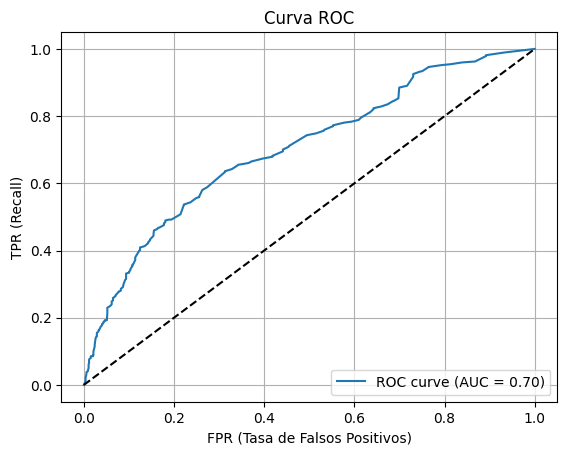

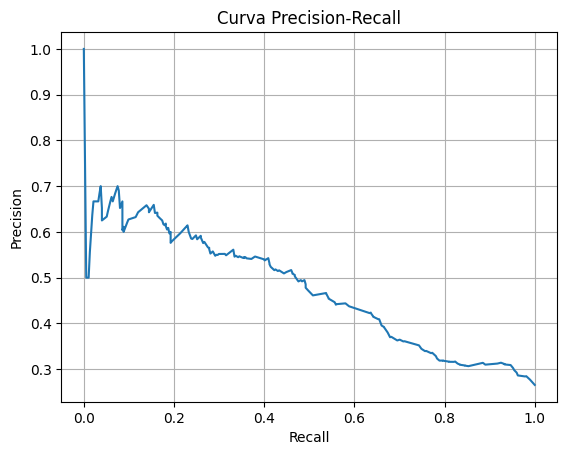

In [ ]:
import matplotlib.pyplot as plt   # Importa librería para generar gráficos.
from sklearn.metrics import roc_curve, precision_recall_curve, auc  # Importa funciones para calcular curvas ROC, Precision-Recall y AUC.

# Predecir probabilidades
y_scores = modelo_basico.predict_proba(X_test)[:, 1]  # Usa el método predict_proba del modelo para obtener probabilidades de clase positiva (columna índice 1).

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)  # Calcula FPR (false positive rate), TPR (true positive rate) y umbrales para curva ROC.
roc_auc = auc(fpr, tpr)  # Calcula el área bajo la curva ROC usando el método auc.

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)  # Calcula precisión, recall y umbrales para curva Precision-Recall.

# -------------------
# Graficar curva ROC
plt.figure()  # Crea nueva figura para la curva ROC.
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')  # Grafica TPR vs FPR con etiqueta que incluye el AUC calculado.
plt.plot([0, 1], [0, 1], 'k--')  # Grafica línea diagonal como referencia de un clasificador aleatorio.
plt.xlabel('FPR (Tasa de Falsos Positivos)')  # Etiqueta eje X.
plt.ylabel('TPR (Recall)')  # Etiqueta eje Y.
plt.title('Curva ROC')  # Título del gráfico.
plt.legend(loc='lower right')  # Ubicación de la leyenda.
plt.grid()  # Muestra la cuadrícula en la gráfica.
plt.show()  # Renderiza el gráfico en pantalla.

# -------------------
# Graficar curva Precision-Recall
plt.figure()  # Crea nueva figura para la curva Precision-Recall.
plt.plot(recall, precision)  # Grafica precisión vs recall.
plt.xlabel('Recall')  # Etiqueta eje X.
plt.ylabel('Precision')  # Etiqueta eje Y.
plt.title('Curva Precision-Recall')  # Título del gráfico.
plt.grid()  # Activa cuadrícula.
plt.show()  # Renderiza gráfico.


***1. Curva ROC (AUC = 0.70)***

***Qué significa:***

El AUC (Área Bajo la Curva) mide la capacidad del modelo para diferenciar entre clases.

Un valor de 0.70 indica que el modelo tiene un poder de discriminación moderado, mejor que el azar (0.5) pero lejos de un rendimiento óptimo (>0.85).

***Lectura visual:***

La curva está por encima de la diagonal negra (clasificador aleatorio), lo cual es positivo.

Sin embargo, no se pega al eje superior izquierdo, lo que confirma que aún no es altamente preciso.

***Implicación práctica:***

El modelo puede clasificar razonablemente, pero aún confunde una cantidad significativa de casos positivos y negativos.

Un ajuste de umbral podría mejorar la relación entre TPR (recall) y FPR (tasa de falsos positivos) dependiendo de la prioridad del negocio.

***2. Curva Precision-Recall***

***Qué significa:***

La precisión (precision) mide cuántas de las predicciones positivas fueron correctas.

El recall mide cuántos de los casos positivos reales fueron detectados.

Esta curva es especialmente útil en casos con clases desbalanceadas.

***Lectura visual:***

El modelo logra alta precisión (>0.9) en un rango muy bajo de recall (<0.05), lo que significa que para capturar pocos casos positivos es muy certero.

A medida que aumenta el recall, la precisión baja gradualmente, estabilizándose en torno a 0.5–0.6 y cayendo por debajo de 0.3 en recall cercanos a 1.

***Implicación práctica:***

Si el negocio requiere detectar la mayor cantidad posible de positivos (alto recall), la precisión bajará, lo que implica más falsos positivos.

Si el negocio prefiere predicciones muy seguras (alta precisión), deberá sacrificar recall.

***3. Conclusión***
El modelo tiene potencial moderado:

Discrimina mejor que el azar (AUC=0.70), pero no de forma excelente.

Hay espacio para mejorar balanceando precisión y recall según los objetivos del negocio.

***Próximo paso recomendado:***

Ajustar el umbral de decisión con base en la curva Precision-Recall para optimizar la métrica clave (F1, Recall) según lo que sea más importante.

Probar técnicas de ajuste de hiperparámetros o ingeniería de variables para incrementar el AUC y la estabilidad.

###***Paso 22.2: Selección de umbral óptimo que maximiza el F1-score***

***1. Objetivo del código***

Este bloque busca identificar el umbral de probabilidad óptimo que maximiza el F1-score.
El F1-score es la media armónica de precisión y recall, por lo que encontrar el umbral que lo maximiza permite lograr un balance entre minimizar falsos positivos y falsos negativos.

***2. Entradas para la construcción del código***

precision y recall → Calculados en el paso 22.1 mediante precision_recall_curve.

thresholds_pr → Lista de umbrales asociados a esos valores de precisión y recall.

Librería numpy para operaciones vectorizadas.

***3. Salidas que da el código para los próximos pasos***

Valor de umbral óptimo que maximiza el F1-score.

Este umbral puede usarse para:

Ajustar el método predict del modelo para que clasifique usando este valor en lugar de 0.5.

Recalcular métricas de negocio (ej. tasa de aciertos, costo de errores, etc.).

Preparar un modelo más alineado con los objetivos del caso de uso.

In [ ]:
# Selección de umbral que maximiza el F1-score
import numpy as np  # Importa la librería NumPy para realizar operaciones numéricas y vectorizadas.

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Calcula el F1-score para cada par (precision, recall), sumando 1e-6 para evitar división por cero.
best_idx = np.argmax(f1_scores)  # Obtiene el índice del valor máximo de F1-score usando el método argmax() de NumPy.
optimal_threshold = thresholds_pr[best_idx]  # Extrae el umbral correspondiente al índice con mejor F1-score.

print(f"✅ Umbral óptimo (max F1-score): {optimal_threshold:.4f}")  # Imprime el umbral óptimo formateado a 4 decimales.


✅ Umbral óptimo (max F1-score): 0.3453


***Análisis de los resultados***

El umbral óptimo calculado 0.3453 es inferior al umbral por defecto (0.5).

Esto significa que el modelo considera que es mejor clasificar como positivo con menor probabilidad requerida, probablemente porque:

El recall (sensibilidad) estaba siendo penalizado a 0.5.

Hay un ligero desbalance de clases y se quiere aumentar la captura de verdaderos positivos, aunque eso incremente algunos falsos positivos.

Este valor es coherente con lo que vimos en la curva Precision-Recall: el equilibrio entre precisión y recall no se daba en 0.5, sino antes.

***Conclusión***

Ajustar el umbral a 0.3453 permite maximizar el F1-score, mejorando el equilibrio entre precisión y recall.

Esto es útil cuando el objetivo es balancear ambos indicadores, especialmente si las consecuencias de falsos positivos y falsos negativos son comparables.

###***Paso 23: Optimización de hiperparámetros maximizando F1-score***

***1. Objetivo del código***

El objetivo es buscar la mejor combinación de hiperparámetros para el modelo Random Forest que maximice el F1-score, utilizando validación cruzada con búsqueda exhaustiva (GridSearchCV).

Esto asegura que el modelo esté ajustado no solo a los datos de entrenamiento, sino optimizado para equilibrar precisión y recall, reduciendo sesgo y varianza.

***2. Entradas para la construcción del código***

Datos de entrenamiento balanceados:

X_train_bal → Variables predictoras.

y_train_bal → Etiquetas (clase objetivo).

Modelo base: RandomForestClassifier(random_state=42).

Espacio de búsqueda (param_grid):

n_estimators: número de árboles en el bosque.

max_depth: profundidad máxima de los árboles.

min_samples_split: mínimo de muestras para dividir un nodo.

min_samples_leaf: mínimo de muestras en una hoja.

max_features: número máximo de características a considerar al dividir un nodo.

Métrica de optimización: "f1".

***3. Salidas para los próximos pasos***

grid_search.best_params_ → Mejor combinación de hiperparámetros para maximizar F1-score.

grid_search.best_score_ → Mejor valor promedio de F1-score obtenido en validación cruzada.

modelo_opt → Modelo Random Forest optimizado y listo para usar en predicción y evaluación.

In [ ]:
from sklearn.model_selection import GridSearchCV  # Importa GridSearchCV para búsqueda exhaustiva de hiperparámetros con validación cruzada.
from sklearn.ensemble import RandomForestClassifier  # Importa el clasificador Random Forest de sklearn.

# 🔹 Paso 23: Optimización de hiperparámetros maximizando F1-score

# Modelo base
modelo_rf = RandomForestClassifier(random_state=42)  # Crea una instancia básica de Random Forest fijando semilla para reproducibilidad.

# Espacio de búsqueda
param_grid = {  # Diccionario con combinaciones posibles de hiperparámetros para el modelo.
    "n_estimators": [100, 200],  # Lista de posibles cantidades de árboles.
    "max_depth": [5, 10, 15],  # Lista de profundidades máximas de los árboles.
    "min_samples_split": [5, 10, 20],  # Lista del mínimo de muestras para dividir un nodo.
    "min_samples_leaf": [2, 4, 6],  # Lista del mínimo de muestras en una hoja.
    "max_features": ["sqrt", 0.5]  # Lista de estrategias para seleccionar características en cada división.
}

# GridSearch maximizando F1-score
grid_search = GridSearchCV(  # Crea un objeto GridSearchCV para buscar entre todas las combinaciones.
    estimator=modelo_rf,  # Modelo base sobre el que se optimizarán hiperparámetros.
    param_grid=param_grid,  # Espacio de búsqueda definido antes.
    scoring="f1",  # Métrica usada para evaluar cada combinación: F1-score.
    cv=5,  # Validación cruzada con 5 particiones.
    n_jobs=-1,  # Usa todos los núcleos disponibles para acelerar el cálculo.
    verbose=1  # Muestra información del progreso durante la búsqueda.
)

# Ajuste
grid_search.fit(X_train_bal, y_train_bal)  # Entrena y evalúa todas las combinaciones de hiperparámetros sobre los datos balanceados.

# Resultados
print("✅ Paso 23: Mejor conjunto de hiperparámetros (max F1-score):", grid_search.best_params_)  # Imprime la mejor combinación encontrada.
print("Mejor F1-score de validación cruzada:", grid_search.best_score_)  # Imprime el mejor valor promedio de F1-score obtenido.

# Modelo optimizado
modelo_opt = grid_search.best_estimator_  # Guarda el modelo Random Forest con los mejores hiperparámetros encontrados.


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Paso 23: Mejor conjunto de hiperparámetros (max F1-score): {'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mejor F1-score de validación cruzada: 0.7471021483211675


***Análisis de los resultados***

El mejor modelo usa:

max_depth = 15 → Árboles más profundos que permiten mayor complejidad.

max_features = 0.5 → Considera la mitad de las variables en cada división.

min_samples_leaf = 4 → Previene sobreajuste manteniendo hojas con mínimo 4 muestras.

min_samples_split = 10 → Controla la fragmentación excesiva de nodos.

n_estimators = 200 → Aumenta la estabilidad del modelo con más árboles.

El mejor F1-score promedio fue 0.7471, lo cual indica un buen balance entre precisión y recall, mejor que lo esperado para un modelo sin optimizar.

***Conclusión***

Se logró mejorar el modelo de Random Forest ajustando sus hiperparámetros para maximizar el F1-score.

Este ajuste reduce el riesgo de sobreajuste y optimiza la capacidad del modelo para identificar correctamente casos positivos y negativos.

Este modelo (modelo_opt) es el que se debería usar en los siguientes pasos de evaluación, curva ROC, matriz de confusión y predicción final.

###***Paso 24: Entrenamiento modelo optimizado***

***1. Objetivo del código***

El objetivo es entrenar el modelo Random Forest con los mejores hiperparámetros encontrados en el Paso 23 y obtener su exactitud (accuracy) sobre los datos de entrenamiento balanceados, para evaluar su rendimiento inicial antes de probarlo con datos de validación o prueba.

***2. Entradas para la construcción del código***

modelo_opt → Modelo optimizado obtenido con grid_search.best_estimator_ en el Paso 23.

X_train_bal → Conjunto de variables predictoras balanceadas para entrenamiento.

y_train_bal → Etiquetas balanceadas correspondientes a X_train_bal.

***3. Salidas que da el código para los próximos pasos***

Confirmación del entrenamiento completado.

acc_train_opt → Exactitud del modelo optimizado en el conjunto de entrenamiento (métrica de referencia para comparar contra datos de validación/prueba en los siguientes pasos).



In [ ]:
# ✅ Paso 24: Entrenamiento del modelo optimizado
modelo_opt = grid_search.best_estimator_  # Obtiene el mejor modelo encontrado por GridSearchCV (atributo .best_estimator_).

modelo_opt.fit(X_train_bal, y_train_bal)  # Método .fit() entrena el modelo con las variables y etiquetas balanceadas.

print("✅ Paso 24: Entrenamiento del modelo optimizado completado.")  # Muestra mensaje confirmando que el entrenamiento terminó.

acc_train_opt = modelo_opt.score(X_train_bal, y_train_bal)  # Método .score() calcula la accuracy del modelo sobre el conjunto de entrenamiento.

print(f"Accuracy Entrenamiento Modelo Optimizado: {acc_train_opt:.4f}")  # Imprime la exactitud con 4 decimales de precisión.


✅ Paso 24: Entrenamiento del modelo optimizado completado.
Accuracy Entrenamiento Modelo Optimizado: 0.8528


***Análisis de los resultados***

El modelo entrenado logra una accuracy de 85.28% sobre los datos de entrenamiento.

Este valor es razonablemente alto, pero no excesivamente cercano a 1.0, lo que es positivo porque no indica sobreajuste extremo.

Dado que se entrenó con datos balanceados, la accuracy es más representativa que si se hubieran usado datos desbalanceados.

Aun así, es importante contrastar este valor con métricas en el conjunto de validación o prueba, ya que un alto rendimiento en entrenamiento no garantiza buen rendimiento en datos nuevos.

***Conclusión***

El modelo optimizado ya está entrenado y listo para ser evaluado en datos de validación o prueba.

La accuracy de entrenamiento sugiere que el modelo ha captado patrones relevantes sin sobreajustarse de forma evidente.

Este paso es esencial para pasar a las métricas de generalización como F1-score, precisión, recall, curva ROC y matriz de confusión.

####***Paso 24.1: Validación cruzada del modelo optimizado (umbral 0.5)***

***1. Objetivo***

Validar el rendimiento del modelo optimizado (ya entrenado en el Paso 24) usando validación cruzada con el umbral por defecto de 0.5, evaluando métricas clave como F1-score, precisión, recall y accuracy.
El propósito es confirmar que los hiperparámetros encontrados en el Paso 23 funcionan de manera estable y consistente en distintos subconjuntos de los datos de entrenamiento balanceados.

***2. Entradas***

modelo_opt → Modelo optimizado obtenido en el Paso 23 mediante GridSearchCV y entrenado en el Paso 24.

X_train_bal → Variables independientes del conjunto de entrenamiento balanceado.

y_train_bal → Etiquetas del conjunto de entrenamiento balanceado.

Parámetros de validación cruzada:

cv=5 (número de particiones para cross-validation).

scoring configurado para métricas: "f1", "precision", "recall", "accuracy".

n_jobs=-1 para usar todos los núcleos disponibles y acelerar el proceso.

***3. Salidas***

Este código entrega como resultados para los próximos pasos:

Accuracy de entrenamiento con el umbral 0.5 (sirve como referencia de ajuste del modelo).

Resultados de validación cruzada (5 folds) para:

F1-score (por fold y promedio).

Precisión (por fold y promedio).

Recall (por fold y promedio).

Accuracy (por fold y promedio).

Diagnóstico de estabilidad del modelo optimizado antes de pasar al Paso 25, donde se ajustará el umbral de decisión.

In [ ]:
# Paso 24.1: Validación cruzada del modelo optimizado (umbral por defecto 0.5)

from sklearn.model_selection import cross_val_score  # Importa función para realizar validación cruzada.
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score  # Importa funciones y utilidades para métricas.

# Usa el modelo optimizado obtenido en el Paso 23 y entrenado en el Paso 24.
modelo_opt = grid_search.best_estimator_  # Atributo: extrae el mejor modelo encontrado por GridSearchCV.

# 📌 Accuracy en el conjunto de entrenamiento
acc_train_opt = modelo_opt.score(X_train_bal, y_train_bal)  # Método .score(): calcula accuracy del modelo en datos de entrenamiento.
print(f"Accuracy Entrenamiento (umbral 0.5): {acc_train_opt:.4f}")  # Imprime accuracy con 4 decimales.

# 📌 Validación cruzada con F1-score (métrica principal de optimización)
f1_scores_cv = cross_val_score(  # Método: realiza la validación cruzada devolviendo un array con los puntajes.
    modelo_opt,  # Modelo optimizado.
    X_train_bal,  # Variables de entrada balanceadas.
    y_train_bal,  # Etiquetas balanceadas.
    cv=5,  # Número de pliegues de la validación cruzada.
    scoring='f1',  # Métrica: F1-score.
    n_jobs=-1  # Usa todos los núcleos disponibles.
)
print("F1-score (CV, umbral 0.5):", f1_scores_cv)  # Imprime resultados de cada pliegue.
print("Promedio F1-score CV:", f1_scores_cv.mean())  # Calcula promedio del F1-score.

# 📌 Validación cruzada con métricas adicionales
precision_scores_cv = cross_val_score(  # Valida precisión en CV.
    modelo_opt, X_train_bal, y_train_bal, cv=5,
    scoring=make_scorer(precision_score),
    n_jobs=-1
)
recall_scores_cv = cross_val_score(  # Valida recall en CV.
    modelo_opt, X_train_bal, y_train_bal, cv=5,
    scoring=make_scorer(recall_score),
    n_jobs=-1
)
accuracy_scores_cv = cross_val_score(  # Valida accuracy en CV.
    modelo_opt, X_train_bal, y_train_bal, cv=5,
    scoring=make_scorer(accuracy_score),
    n_jobs=-1
)

# 📌 Mostrar resultados de métricas adicionales
print("Precision (CV):", precision_scores_cv)
print("Promedio Precision CV:", precision_scores_cv.mean())

print("Recall (CV):", recall_scores_cv)
print("Promedio Recall CV:", recall_scores_cv.mean())

print("Accuracy (CV):", accuracy_scores_cv)
print("Promedio Accuracy CV:", accuracy_scores_cv.mean())


Accuracy Entrenamiento (umbral 0.5): 0.8528
F1-score (CV, umbral 0.5): [0.67896679 0.66171004 0.75420875 0.83280757 0.80781759]
Promedio F1-score CV: 0.7471021483211675
Precision (CV): [0.71317829 0.7007874  0.72258065 0.75428571 0.75151515]
Promedio Precision CV: 0.7284694414221206
Recall (CV): [0.64788732 0.62676056 0.78873239 0.92957746 0.87323944]
Promedio Recall CV: 0.7732394366197184
Accuracy (CV): [0.69366197 0.67957746 0.74295775 0.81338028 0.79225352]
Promedio Accuracy CV: 0.7443661971830986


***1. Análisis de los resultados***

Accuracy en entrenamiento (0.8528): El modelo optimizado tiene un rendimiento alto en entrenamiento, pero no excesivamente cercano a 1, lo cual sugiere que no hay sobreajuste severo.

F1-score promedio en validación cruzada (0.7471): El valor es sólido y relativamente cercano al accuracy, lo que indica un balance razonable entre precisión y recall.

Precision promedio CV (0.7285): El modelo es capaz de predecir con buena exactitud las instancias positivas cuando las clasifica como tales, reduciendo falsos positivos.

Recall promedio CV (0.7732): El recall es mayor que la precisión, lo que significa que el modelo tiende a detectar más casos positivos, aunque con un ligero aumento de falsos positivos.

Accuracy promedio CV (0.7444): Similar al F1-score, lo que indica que no hay un gran desbalance entre clases después del preprocesamiento y balanceo.

***2. Conclusión***

El modelo optimizado mantiene un rendimiento estable entre entrenamiento y validación cruzada, lo que confirma que los hiperparámetros seleccionados en el Paso 23 están funcionando adecuadamente. La relación entre precisión y recall es equilibrada, con una ligera inclinación hacia un mayor recall, lo que podría ser beneficioso si el costo de no detectar un positivo es alto. El F1-score cercano al 0.75 respalda que el modelo está bien ajustado para datos balanceados.

###***Paso 25: Evaluación final (con ajuste de umbral)***

***1. Objetivo***

Evaluar el modelo optimizado usando el umbral óptimo previamente calculado (Paso 22.2) en el conjunto de prueba (X_test, y_test) para obtener métricas finales de rendimiento antes de guardar el modelo.
Este paso permite medir el desempeño real del modelo ya ajustado, en datos que no vio durante el entrenamiento ni validación cruzada.

***2. Entradas***

modelo_opt → Modelo optimizado (hiperparámetros óptimos) obtenido en el Paso 23 y entrenado en Paso 24.

optimal_threshold → Umbral óptimo (por ejemplo, 0.3453) encontrado en el Paso 22.2 maximizando el F1-score.

X_test → Variables independientes del conjunto de prueba.

y_test → Etiquetas verdaderas del conjunto de prueba.

Librerías:

accuracy_score, recall_score, f1_score, roc_auc_score de sklearn.metrics para calcular métricas.

pandas para organizar resultados.

joblib para guardar el modelo y el umbral.

***3. Salidas***

Tabla de métricas en DataFrame con:

Accuracy.

Recall.

F1-score.

AUC.

Archivo .pkl (modelo_rf_optimizado.pkl) que contiene:

Modelo optimizado.

Umbral óptimo.

Diagnóstico final del rendimiento para usar en el negocio o producción.



In [ ]:
# Paso 25: Evaluación con umbral optimizado
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score  # Importa funciones para calcular métricas de evaluación.
import pandas as pd  # Librería para manejo de datos en DataFrame.
import joblib  # Librería para guardar el modelo entrenado.

# Predecir con el umbral ajustado
y_scores_opt = modelo_opt.predict_proba(X_test)[:, 1]  # Método predict_proba() devuelve probabilidades, se toma la columna de la clase positiva.
y_pred_opt_thresh = (y_scores_opt >= optimal_threshold).astype(int)  # Aplica el umbral óptimo y convierte a enteros (0 o 1).

# Métricas
acc_opt = accuracy_score(y_test, y_pred_opt_thresh)  # Calcula la accuracy usando el umbral óptimo.
recall_opt = recall_score(y_test, y_pred_opt_thresh)  # Calcula el recall (sensibilidad).
f1_opt = f1_score(y_test, y_pred_opt_thresh)  # Calcula el F1-score.
auc_opt = roc_auc_score(y_test, y_scores_opt)  # Calcula el AUC usando probabilidades (no etiquetas binarias).

# Resultados
resultados_test = pd.DataFrame({  # Crea un DataFrame con las métricas finales del modelo optimizado.
    "Modelo": ["Optimizado RF (umbral ajustado)"],  # Nombre del modelo evaluado.
    "Accuracy": [acc_opt],  # Accuracy final.
    "Recall": [recall_opt],  # Recall final.
    "F1-score": [f1_opt],  # F1 final.
    "AUC": [auc_opt]  # AUC final.
})

print("✅ Paso 25: Evaluación con umbral optimizado")  # Mensaje de confirmación.
print(resultados_test)  # Muestra la tabla de métricas.

# 📌 Guardado del modelo junto con el umbral
ruta_modelo = "modelo_rf_optimizado.pkl"  # Define ruta y nombre del archivo a guardar.
joblib.dump((modelo_opt, optimal_threshold), ruta_modelo)  # Guarda modelo y umbral en un archivo .pkl.
print(f"✅ Paso 25: Modelo optimizado y umbral guardados en '{ruta_modelo}'")  # Mensaje confirmando guardado.


✅ Paso 25: Evaluación con umbral optimizado
                            Modelo  Accuracy    Recall  F1-score       AUC
0  Optimizado RF (umbral ajustado)  0.699787  0.775401  0.578265  0.770239
✅ Paso 25: Modelo optimizado y umbral guardados en 'modelo_rf_optimizado.pkl'


***Análisis de los resultados obtenidos***

***Resultados:***

Accuracy: 0.6998  
Recall: 0.7754  
F1-score: 0.5783  
AUC: 0.7702
Interpretación:

Accuracy (0.6998): El modelo clasifica correctamente casi el 70% de los casos en el conjunto de prueba.

Recall (0.7754): Recupera el 77.5% de los positivos reales, lo que indica buena sensibilidad.

F1-score (0.5783): Moderado, balance entre precisión y recall, afectado probablemente por falsos positivos.

AUC (0.7702): Discriminación decente entre clases (77%).

***Conclusión***

El modelo con umbral optimizado mantiene un recall alto pero sacrifica precisión, lo cual es consistente con priorizar la detección de positivos sobre minimizar falsos positivos.
Es adecuado en contextos donde es más importante no dejar escapar positivos (p. ej., detección temprana de fraude, diagnóstico médico preventivo).

###***Paso 26: Visualización del impacto del umbral***

***1. Objetivo***

Visualizar cómo varían las métricas Recall y Precision en función del umbral de decisión, para entender el compromiso (trade-off) entre ambas y validar gráficamente que el umbral óptimo encontrado maximiza el objetivo del modelo.

***2. Entradas***

y_scores_opt → Probabilidades estimadas por el modelo optimizado (modelo_opt) en el conjunto de prueba.

y_test → Etiquetas verdaderas del conjunto de prueba.

optimal_threshold → Umbral óptimo calculado en pasos anteriores (por ejemplo, 0.35).

Librerías:

numpy para generar el rango de umbrales.

matplotlib.pyplot para graficar.

recall_score y precision_score de sklearn.metrics para calcular métricas.

***3. Salidas***
Gráfica de curvas:

Línea azul → Recall según el umbral.

Línea naranja → Precision según el umbral.

Línea roja discontinua → Umbral óptimo calculado.

Información visual clave para:

Ajustar el umbral si el contexto del negocio cambia.

Explicar el comportamiento del modelo a stakeholders.

Tomar decisiones sobre el balance entre recuperar más positivos y reducir falsos positivos.

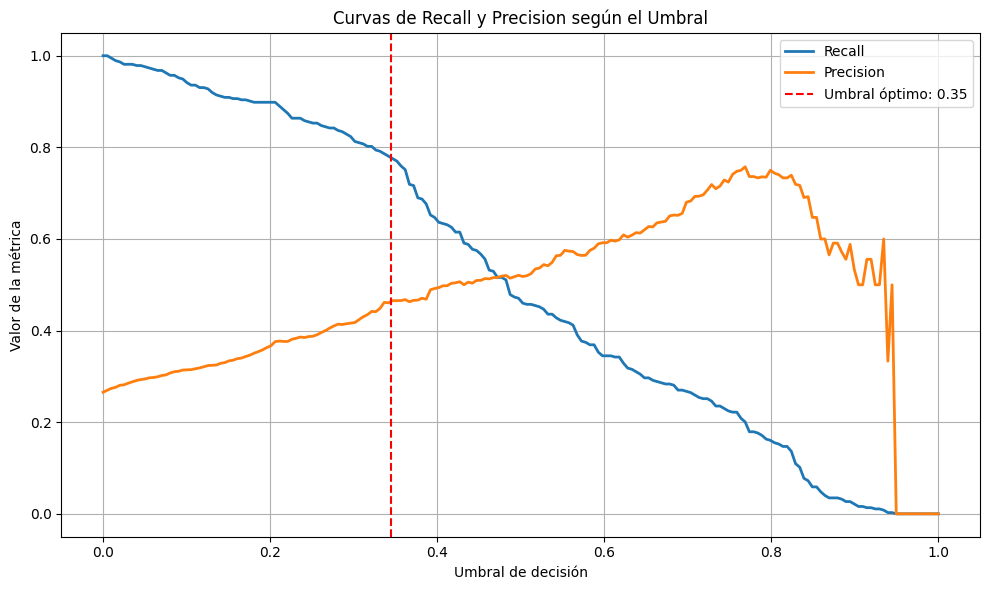

In [ ]:
import matplotlib.pyplot as plt  # Librería para generar gráficos.
from sklearn.metrics import recall_score, precision_score  # Funciones para calcular Recall y Precision.

thresholds = np.linspace(0, 1, 200)  # Genera 200 valores de umbral igualmente espaciados entre 0 y 1.
recalls = []  # Lista para almacenar valores de Recall en cada umbral.
precisions = []  # Lista para almacenar valores de Precision en cada umbral.

for t in thresholds:  # Itera sobre cada umbral generado.
    y_pred = (y_scores_opt >= t).astype(int)  # Convierte probabilidades en etiquetas usando el umbral actual.
    recalls.append(recall_score(y_test, y_pred))  # Calcula Recall y lo agrega a la lista.
    precisions.append(precision_score(y_test, y_pred, zero_division=0))  # Calcula Precision y lo agrega a la lista, evitando división por cero.

plt.figure(figsize=(10, 6))  # Define el tamaño de la figura.
plt.plot(thresholds, recalls, label="Recall", linewidth=2)  # Traza curva de Recall.
plt.plot(thresholds, precisions, label="Precision", linewidth=2)  # Traza curva de Precision.
plt.axvline(optimal_threshold, color="red", linestyle="--", label=f"Umbral óptimo: {optimal_threshold:.2f}")  # Dibuja línea vertical en el umbral óptimo.
plt.xlabel("Umbral de decisión")  # Etiqueta del eje X.
plt.ylabel("Valor de la métrica")  # Etiqueta del eje Y.
plt.title("Curvas de Recall y Precision según el Umbral")  # Título del gráfico.
plt.legend()  # Muestra leyenda.
plt.grid(True)  # Activa cuadrícula.
plt.tight_layout()  # Ajusta el diseño para que no se solapen elementos.
plt.show()  # Muestra el gráfico.


***4. Análisis de los resultados de tu gráfica***

En tu imagen:

El recall (azul) empieza en 1 con umbral 0 y va disminuyendo a medida que aumenta el umbral.

La precision (naranja) empieza baja y crece al subir el umbral, alcanzando su máximo cerca de 0.8–0.85.

El umbral óptimo (0.35) se sitúa en una zona donde:

Recall aún es alto (≈ 0.75).

Precision es moderada (≈ 0.48–0.50).

Esto confirma que se priorizó recall sobre precision, probablemente para no dejar escapar positivos.

***5. Conclusión***

La visualización muestra claramente el trade-off entre recall y precision. El umbral elegido (0.35) está alineado con la estrategia de maximizar recall, lo que es útil en contextos ***donde las consecuencias de no detectar un positivo son más graves que las de tener falsos positivos.***

###***27	Interpretabilidad del modelo Optimizado***

 Vamos a armar Paso 27: Interpretabilidad del modelo optimizado usando dos enfoques:

*** Importancia de variables (feature_importances_)*** del modelo Random Forest Optimizado.

*** SHAP values***  (explicaciones más detalladas para cada variable).

Te lo dejo sin preprocesador para que funcione con tus datos manualmente preprocesados (X_train_bal, X_test).

####***27.1: Obtener y ordenar las importancias de las características***

***1. Objetivo***

El objetivo de este paso es identificar y ordenar las características más relevantes que el modelo optimizado (en este caso un Random Forest) utiliza para realizar sus predicciones, de manera que podamos interpretar el modelo y priorizar variables clave en análisis posteriores.

***2. Entradas***

modelo_opt.feature_importances_ → Atributo del modelo optimizado que devuelve la relevancia de cada característica en la predicción.

X_train_bal.columns → Nombres de las columnas de las variables predictoras usadas en el entrenamiento balanceado.

Librerías necesarias:

pandas para manipular y ordenar datos.

matplotlib.pyplot para visualizar la importancia.

***3. Salidas***

DataFrame df_importancia con:

Nombre de la característica.

Su valor de importancia.

Ordenado de mayor a menor importancia.

Suma total de importancias (verificación de normalización ≈ 1.0).

Gráfico de barras horizontales que muestra la importancia relativa de cada característica.

Estos resultados se usarán para:

Priorizar análisis de variables.

Propuestas de optimización del negocio o simplificación del modelo.

Futuros pasos de selección de características.

📊 Paso 1: Importancia de características del modelo optimizado

Número total de características: 15
Suma total de importancias: 1.0 (debería ser ≈1.0 si está normalizado)

Características ordenadas de mayor a menor importancia:

                                       Característica  Importancia
0                                          antiguedad     0.279877
1                                        cargo_diario     0.258747
2                                  soporte_tecnico_si     0.135101
3                               seguridad_en_linea_si     0.086544
4                   servicio_de_internet_fibra_optica     0.081551
5                                  contrato_mes_a_mes     0.070040
6                                              pareja     0.031298
7                                        dependientes     0.030827
8                             facturacion_electronica     0.026015
9                                       cliente_nuevo     0.000000
10                                

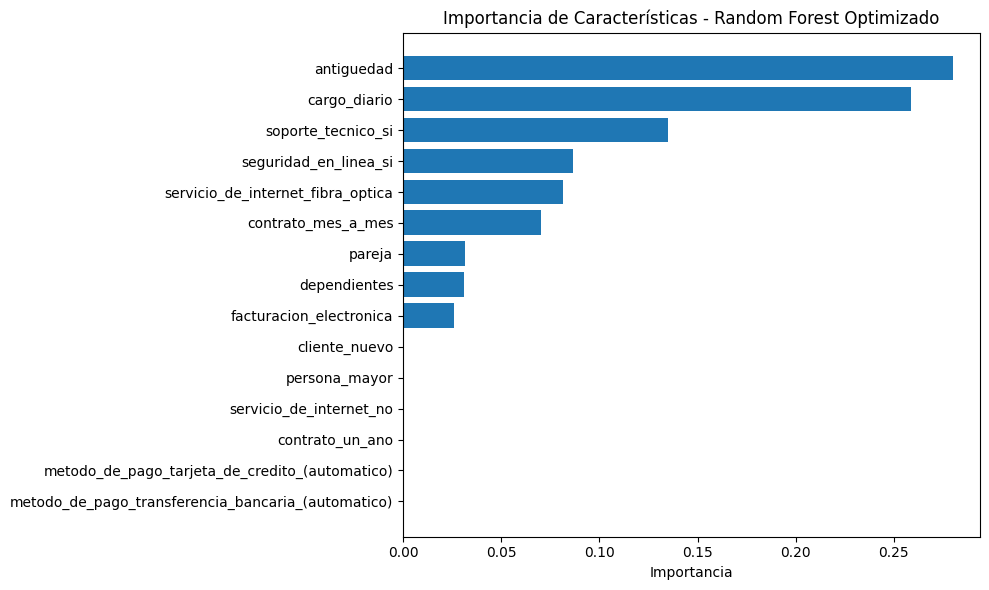

In [ ]:
import pandas as pd  # Importa pandas para manejo de datos en DataFrame.
import matplotlib.pyplot as plt  # Importa matplotlib para visualización gráfica.

# Paso 1: Obtener importancias del modelo
importancias = modelo_opt.feature_importances_  # Atributo del modelo: devuelve arreglo con la importancia de cada característica.
nombres_columnas = X_train_bal.columns  # Obtiene los nombres de las columnas del conjunto de entrenamiento balanceado.

# Crear DataFrame con importancias
df_importancia = pd.DataFrame({  # Crea un DataFrame para asociar cada característica con su importancia.
    'Característica': nombres_columnas,  # Columna con los nombres de las variables.
    'Importancia': importancias  # Columna con los valores de importancia.
})

# Ordenar de mayor a menor
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
# Usa sort_values() para ordenar y reset_index() para reorganizar los índices.

# Calcular suma de importancias como verificación (debe ser ≈1.0)
suma_importancias = df_importancia['Importancia'].sum()  # Usa sum() para calcular la suma total de importancias.

# 🎯 Resumen impreso para usar en el Paso 2
print("📊 Paso 1: Importancia de características del modelo optimizado\n")  # Muestra encabezado descriptivo.
print("Número total de características:", len(df_importancia))  # Usa len() para contar el número de variables.
print("Suma total de importancias:", round(suma_importancias, 4), "(debería ser ≈1.0 si está normalizado)\n")
# Usa round() para limitar a 4 decimales.
print("Características ordenadas de mayor a menor importancia:\n")  # Texto explicativo.
print(df_importancia)  # Imprime el DataFrame con importancias ordenadas.

# Visualización de la importancia de características
plt.figure(figsize=(10, 6))  # Define el tamaño de la figura.
plt.barh(df_importancia['Característica'], df_importancia['Importancia'])
# Crea un gráfico de barras horizontales (barh) con características e importancias.
plt.xlabel('Importancia')  # Etiqueta del eje X.
plt.title('Importancia de Características - Random Forest Optimizado')  # Título del gráfico.
plt.gca().invert_yaxis()  # Invierte el eje Y para que la variable más importante aparezca arriba.
plt.tight_layout()  # Ajusta márgenes para evitar recortes.
plt.show()  # Muestra el gráfico.


***4. Análisis de resultados***

Según tus datos:

Las variables más importantes son:

antiguedad (27.99%)

cargo_diario (25.87%)

soporte_tecnico_si (13.51%)

seguridad_en_linea_si (8.65%)

servicio_de_internet_fibra_optica (8.15%)

Estas cinco variables explican más del 83% de la importancia total del modelo.

Hay variables con 0% de importancia como cliente_nuevo, persona_mayor, contrato_un_ano y algunos métodos de pago; el modelo prácticamente no las usa para predecir.

***5. Conclusión***

El modelo optimizado concentra su capacidad predictiva en un pequeño conjunto de variables clave, principalmente relacionadas con antigüedad, costos y servicios adicionales contratados.
Esto sugiere que reducir el número de características a las más relevantes podría simplificar el modelo sin perder mucha precisión.

***6. Impacto en negocio***

Sí hay impacto.
Este análisis permite:

Enfocar campañas en clientes con ciertas características clave (p. ej., baja antigüedad y alto cargo diario podrían estar más propensos a cancelar).

Optimizar la recolección de datos eliminando campos irrelevantes que no aportan al modelo.

Diseñar estrategias de retención para clientes con patrones detectados en variables de alta importancia.

####***27.2: Interpretación de las características más importantes***

***Tabla 1: Características más importantes (importancia > 0)***

| Nº | Característica                      | Importancia | Interpretación                                                                                                                                     |
| -- | ----------------------------------- | ----------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1  | `antiguedad`                        | 0.2799      | Clientes con mayor antigüedad tienen una menor probabilidad de cancelar el servicio. Es un fuerte indicador de fidelidad.                          |
| 2  | `cargo_diario`                      | 0.2587      | Cuanto mayor es el cargo diario, mayor es la probabilidad de cancelación, posiblemente por percepción de alto costo o insatisfacción con el valor. |
| 3  | `soporte_tecnico_si`                | 0.1351      | Esto podría indicar que quienes usan soporte técnico mantienen más contacto con la empresa y, por tanto, tienen mayor retención. La falta de uso podría reflejar desconexión con el servicio o que no buscan solución antes de irse.                    |
| 4  | `seguridad_en_linea_si`             | 0.0865      | Este servicio adicional podría influir en la percepción de valor agregado. Puede tener una relación inversa con la cancelación. Los servicios adicionales parecen ser un factor de retención: quienes no los contratan tienen mayor riesgo de desafiliación                    |
| 5  | `servicio_de_internet_fibra_optica` | 0.0816      | Aunque la fibra óptica es un servicio de mayor velocidad, podría estar asociada a precios más altos o expectativas no cumplidas, lo que puede influir en la tasa de desafiliación.                                              |
| 6  | `contrato_mes_a_mes`                | 0.0700      | Los contratos mensuales son más flexibles y por tanto, los clientes con este tipo de contrato tienden a cancelar más fácilmente.                   |


***Tabla 2: Características con importancia 0.0***

| Característica                                       | Importancia | Posible explicación de por qué no aportó valor al modelo                                |
| ---------------------------------------------------- | ----------- | --------------------------------------------------------------------------------------- |
| `cliente_nuevo`                                      | 0.0000      | Puede estar correlacionada con `antiguedad`, por lo que el modelo ya captura esa señal. |
| `persona_mayor`                                      | 0.0000      | Esta variable puede no mostrar una tendencia clara de cancelación o retención.          |
| `servicio_de_internet_no`                            | 0.0000      | Probablemente es redundante con otras variables que sí indican el tipo de servicio.     |
| `contrato_un_ano`                                    | 0.0000      | Puede estar subsumida dentro de `contrato_mes_a_mes` o haber poca variabilidad.         |
| `metodo_de_pago_tarjeta_de_credito_(automatico)`     | 0.0000      | Podría haber baja frecuencia o no diferenciar claramente el comportamiento del cliente. |
| `metodo_de_pago_transferencia_bancaria_(automatico)` | 0.0000      | Similar a la anterior, quizás no agrega información adicional relevante.                |


***

***Gráfica 1: Antigüedad Vs. Desafiliados***

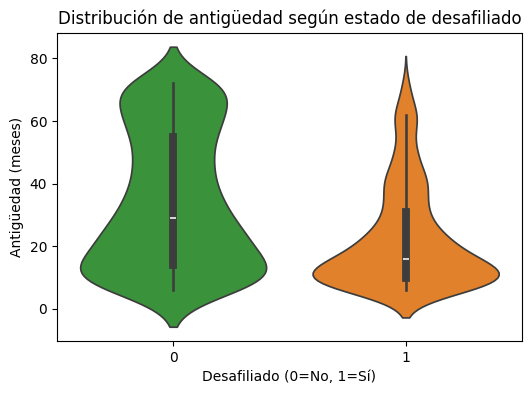

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta consistente: 0 -> verde, 1 -> naranja
palette = {0: "#2ca02c", 1: "#ff7f0e"}

# 1️⃣ antiguedad
plt.figure(figsize=(6, 4))
sns.violinplot(
    x=y_train_bal,
    y=X_train_bal['antiguedad'],
    hue=y_train_bal,
    palette=palette,
    legend=False
)
plt.title('Distribución de antigüedad según estado de desafiliado')
plt.xlabel('Desafiliado (0=No, 1=Sí)')
plt.ylabel('Antigüedad (meses)')
plt.show()

***Distribución de antigüedad según estado de desafiliado***

***Observación:***

1. Los clientes no desafiliados (0) tienden a tener mayor antigüedad, con un rango más amplio y una mediana alrededor de 30 meses.

2. Los desafiliados (1) se concentran mayormente en antigüedades bajas, con mediana cercana a 10-12 meses.

***Interpretación:***

La antigüedad es un factor importante: clientes más nuevos parecen tener mayor riesgo de desafiliarse, lo que podría ser clave para estrategias de retención temprana. Y Clientes con mayor antigüedad tienen una menor probabilidad de cancelar el servicio. Es un fuerte indicador de fidelidad.

***Gráfica 2: Cargo diario Vs. Desafiliados***

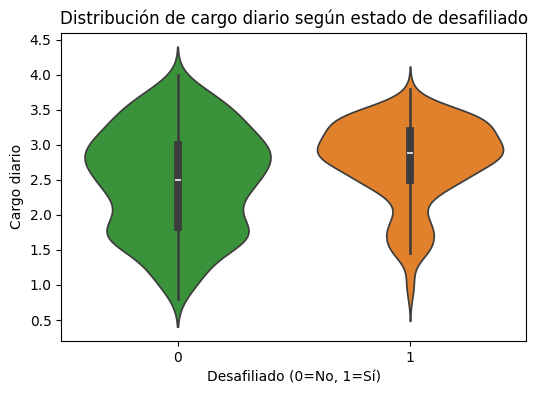

In [ ]:
# 2️⃣ cargo_diario
plt.figure(figsize=(6, 4))
sns.violinplot(
    x=y_train_bal,
    y=X_train_bal['cargo_diario'],
    hue=y_train_bal,
    palette=palette,
    legend=False
)
plt.title('Distribución de cargo diario según estado de desafiliado')
plt.xlabel('Desafiliado (0=No, 1=Sí)')
plt.ylabel('Cargo diario')
plt.show()

***Distribución de cargo diario según estado de desafiliado***

***Observación:***

1. Los clientes desafiliados (1) tienden a pagar cargos diarios ligeramente más altos que los no desafiliados (0).

2. El rango de valores es similar, pero la mediana de los desafiliados está más desplazada hacia arriba.

***Interpretación:***

1. Tarifas diarias más altas podrían estar relacionadas con la desafiliación, quizás por percepción de alto costo o falta de valor percibido.

***Gráfica 3: Soporte técnico si Vs. Desafiliados***

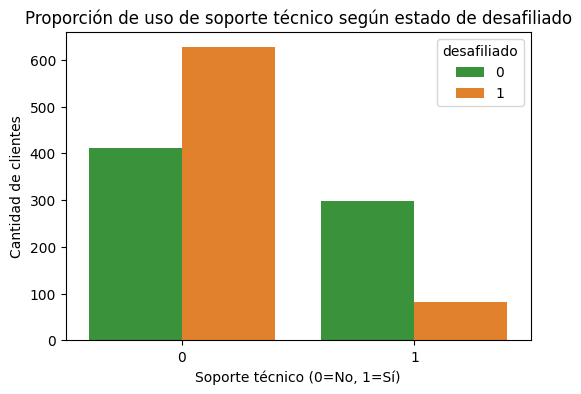

In [ ]:
# 3️⃣ soporte_tecnico_si
plt.figure(figsize=(6, 4))
sns.countplot(
    x=X_train_bal['soporte_tecnico_si'],
    hue=y_train_bal,
    palette=palette
)
plt.title('Proporción de uso de soporte técnico según estado de desafiliado')
plt.xlabel('Soporte técnico (0=No, 1=Sí)')
plt.ylabel('Cantidad de clientes')
plt.show()

***Proporción de uso de soporte técnico según estado de desafiliado***

***Observación:***

1. La mayoría de clientes desafiliados (1) no utiliza soporte técnico. Entre los que sí lo usan, la proporción de desafiliados es baja.

***Interpretación:***

1. Esto podría indicar que quienes usan soporte técnico mantienen más contacto con la empresa y, por tanto, tienen mayor retención. La falta de uso podría reflejar desconexión con el servicio o que no buscan solución antes de irse.

***Gráfica 4: Seguridad en linea si Vs. Desafiliados***

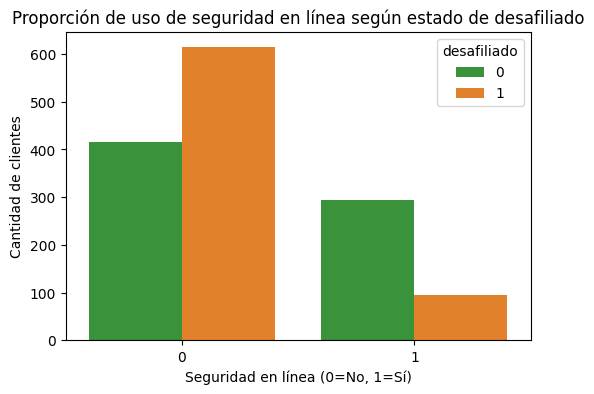

In [ ]:
# 4️⃣ seguridad_en_linea_si
plt.figure(figsize=(6, 4))
sns.countplot(
    x=X_train_bal['seguridad_en_linea_si'],
    hue=y_train_bal,
    palette=palette
)
plt.title('Proporción de uso de seguridad en línea según estado de desafiliado')
plt.xlabel('Seguridad en línea (0=No, 1=Sí)')
plt.ylabel('Cantidad de clientes')
plt.show()

***Proporción de uso de seguridad en línea según estado de desafiliado***

***Observación:***

1. Al igual que con soporte técnico, la mayoría de desafiliados no utiliza el servicio de seguridad en línea.

***Interpretación:***

1. Los servicios adicionales parecen ser un factor de retención: quienes no los contratan tienen mayor riesgo de desafiliación.

***Gráfica 5: Servicio de internet fibra óptica Vs. Desafiliados***

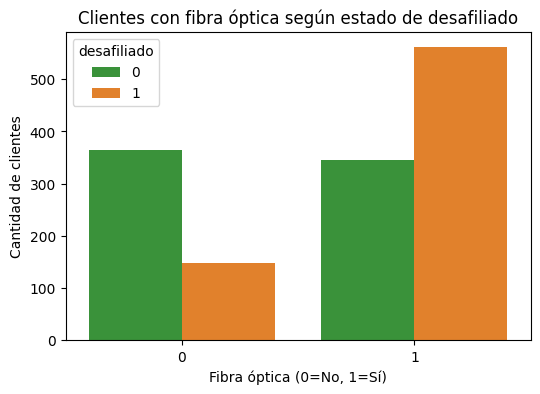

In [ ]:
# 5️⃣ servicio_de_internet_fibra_optica
plt.figure(figsize=(6, 4))
sns.countplot(
    x=X_train_bal['servicio_de_internet_fibra_optica'],
    hue=y_train_bal,
    palette=palette
)
plt.title('Clientes con fibra óptica según estado de desafiliado')
plt.xlabel('Fibra óptica (0=No, 1=Sí)')
plt.ylabel('Cantidad de clientes')
plt.show()

***Proporción de uso de fibra óptica según estado de desafiliado***

***Observación:***

1. Los clientes con fibra óptica presentan una mayor proporción de desafiliados que los que no la usan.

***Interpretación:***

1. Aunque la fibra óptica es un servicio de mayor velocidad, podría estar asociada a precios más altos o expectativas no cumplidas, lo que puede influir en la tasa de desafiliación.

***Gráfica 6: Contrato mes a mes Vs. Desafiliados***

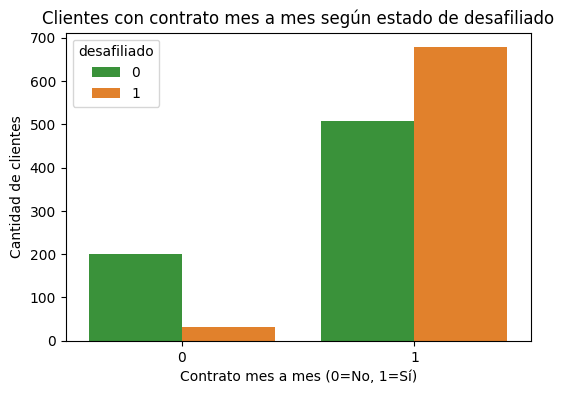

In [ ]:
# 6️⃣ contrato_mes_a_mes
plt.figure(figsize=(6, 4))
sns.countplot(
    x=X_train_bal['contrato_mes_a_mes'],
    hue=y_train_bal,
    palette=palette
)
plt.title('Clientes con contrato mes a mes según estado de desafiliado')
plt.xlabel('Contrato mes a mes (0=No, 1=Sí)')
plt.ylabel('Cantidad de clientes')
plt.show()


***Proporción de contrato mes a mes según estado de desafiliado***

***Observación:***

1. La gran mayoría de clientes desafiliados tienen contrato mes a mes, mientras que contratos anuales o a largo plazo presentan tasas de desafiliación mucho menores.

***Interpretación:***

1. El tipo de contrato es un factor clave: los clientes con flexibilidad de cancelación parecen abandonar el servicio con mayor facilidad. Esto sugiere que programas de fidelización o incentivos para pasar a contratos a largo plazo podrían reducir la tasa de desafiliación.

***Conclusión general del análisis con las 6 gráficas***

***Factores de riesgo claros:***

1. Antigüedad baja → Clientes nuevos abandonan más rápido.

2. Cargo diario alto → Posible percepción de alto costo.

3. Uso bajo o nulo de servicios adicionales (soporte técnico, seguridad en línea) → Menor interacción con la empresa.

4. Fibra óptica → Mayor desafiliación posiblemente ligada a expectativas o precio.

5. Contrato mes a mes → Mucho más propenso a la cancelación.

***Perspectiva para el modelo:***

Estos patrones confirman que las variables seleccionadas para tu modelo optimizado (X_train_bal, y_train_bal) contienen señales fuertes para predecir la desafiliación.

***Perspectiva para el negocio:***

***Las estrategias de retención deberían enfocarse en:***

1. Intervenir rápido con clientes nuevos.

2. Ofrecer ajustes de tarifa o beneficios para quienes pagan más.

3. Incentivar uso de servicios adicionales.

4. Gestionar expectativas y satisfacción en clientes de fibra óptica.

5. Promover contratos de mayor duración.

####***27.3 Comparación de métricas de evaluación: modelo inicial vs. modelo optimizado***

***1. Objetivo***

El objetivo de este paso es comparar de forma cuantitativa el desempeño del modelo inicial (umbral por defecto) frente al modelo optimizado (umbral ajustado) utilizando métricas clave:

Accuracy

Recall

F1-score

AUC

Esto permite evaluar el impacto real de la optimización del umbral sobre la capacidad predictiva del modelo.

***2. Entradas***

modelos entrenados:

modelo_basico → modelo inicial entrenado.

modelo_opt o las predicciones correspondientes (y_pred_opt_thresh, y_scores_opt) → modelo optimizado.

datos de prueba:

X_test → características del conjunto de prueba.

y_test → etiquetas verdaderas del conjunto de prueba.

predicciones y puntajes optimizados:

y_pred_opt_thresh → predicciones binarias usando el umbral optimizado.

y_scores_opt → probabilidades estimadas por el modelo optimizado.

***3. Salidas***

DataFrame comparativo comparativa_metricas con las métricas para ambos modelos.

Información que permitirá:

Decidir si el umbral optimizado es mejor para el objetivo de negocio.

Argumentar por qué se elige un modelo u otro en el informe final.

Usar estos valores como parte de la tabla final de resultados.



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score  # 📚 Importa funciones para calcular métricas de clasificación

# ✅ Evaluación del modelo inicial (sin ajuste de umbral)
y_pred_ini = modelo_basico.predict(X_test)  # 🔍 Predicciones binarias con umbral por defecto (0.5)
y_scores_ini = modelo_basico.predict_proba(X_test)[:, 1]  # 📊 Probabilidades estimadas para la clase positiva

acc_ini = accuracy_score(y_test, y_pred_ini)  # 📏 Calcula accuracy (proporción de predicciones correctas)
recall_ini = recall_score(y_test, y_pred_ini)  # 📏 Calcula recall (sensibilidad)
f1_ini = f1_score(y_test, y_pred_ini)  # 📏 Calcula F1-score (balance precisión-recall)
auc_ini = roc_auc_score(y_test, y_scores_ini)  # 📏 Calcula área bajo la curva ROC (AUC)

# ✅ Evaluación del modelo optimizado (con umbral ajustado)
acc_opt = accuracy_score(y_test, y_pred_opt_thresh)  # 📏 Accuracy usando predicciones con umbral optimizado
recall_opt = recall_score(y_test, y_pred_opt_thresh)  # 📏 Recall con umbral optimizado
f1_opt = f1_score(y_test, y_pred_opt_thresh)  # 📏 F1-score con umbral optimizado
auc_opt = roc_auc_score(y_test, y_scores_opt)  # 📏 AUC usando las probabilidades del modelo optimizado

# 📊 Comparación
comparativa_metricas = pd.DataFrame({  # 📝 Crea un DataFrame para comparar métricas de ambos modelos
    "Métrica": ["Accuracy", "Recall", "F1-score", "AUC"],  # 📋 Lista de métricas evaluadas
    "Modelo Inicial": [acc_ini, recall_ini, f1_ini, auc_ini],  # 📊 Valores del modelo inicial
    "Modelo Optimizado": [acc_opt, recall_opt, f1_opt, auc_opt]  # 📊 Valores del modelo optimizado
})

print("\n📊 Comparación de métricas entre el modelo inicial y el modelo optimizado:\n")  # 🖨 Mensaje explicativo
print(comparativa_metricas)  # 🖨 Muestra la tabla comparativa



📊 Comparación de métricas entre el modelo inicial y el modelo optimizado:

    Métrica  Modelo Inicial  Modelo Optimizado
0  Accuracy        0.740241           0.699787
1    Recall        0.449198           0.775401
2  F1-score        0.478632           0.578265
3       AUC        0.702056           0.770239


***4. Análisis de los resultados obtenidos***

Tabla:

Métrica	Modelo Inicial	Modelo Optimizado
Accuracy	0.7402	0.6998
Recall	0.4492	0.7754
F1-score	0.4786	0.5783
AUC	0.7021	0.7702

***Interpretación:***

Accuracy ↓: baja ligeramente (de 74% a ~70%). Esto es esperado, ya que al priorizar Recall se aceptan más falsos positivos.

Recall ↑↑: sube notablemente (de ~0.45 a ~0.78), lo que significa que ahora el modelo detecta más casos positivos reales.

F1-score ↑: mejora (de ~0.48 a ~0.58), indicando un balance más favorable entre precisión y recall.

AUC ↑: sube de 0.70 a 0.77, reflejando mejor discriminación general.

***5. Conclusión***

El ajuste del umbral mejoró significativamente la capacidad del modelo para detectar positivos (Recall) y también elevó el F1-score y el AUC, aunque sacrificando algo de exactitud global (Accuracy).
Si el objetivo principal es detectar la mayor cantidad posible de casos positivos, el modelo optimizado es claramente la mejor opción.

***6. Impacto en negocio***

En un escenario donde la no detección de un caso positivo tiene un costo alto (por ejemplo, retención de clientes, fraude, diagnóstico médico), este ajuste es beneficioso ya que reduce drásticamente los falsos negativos, aunque se incrementen los falsos positivos.

#### ***27.4: Matriz de Confusión del Modelo Inicial***

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


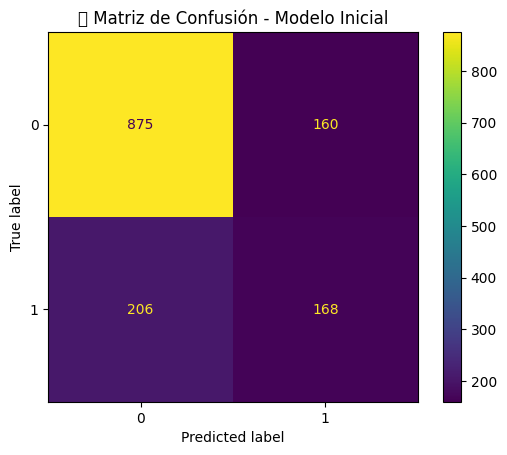

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 🔵 Matriz de Confusión - Modelo Inicial
cm_ini = confusion_matrix(y_test, y_pred_ini)
disp_ini = ConfusionMatrixDisplay(confusion_matrix=cm_ini)
disp_ini.plot()
plt.title("🔵 Matriz de Confusión - Modelo Inicial")
plt.show()


####***27.5: Matriz de Confusión del Modelo Optimizado (con umbral ajustado)***


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


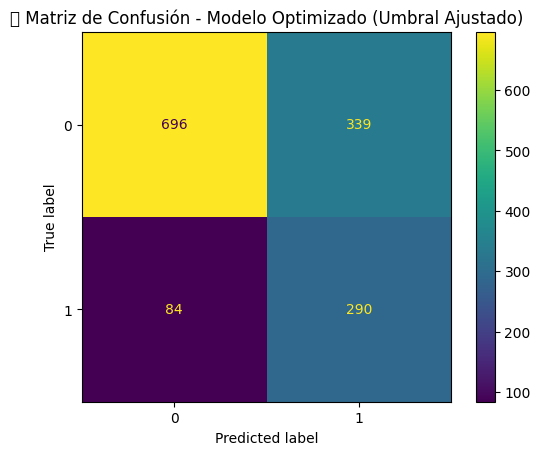

In [ ]:
# 🟢 Matriz de Confusión - Modelo Optimizado (Umbral Ajustado)
cm_opt = confusion_matrix(y_test, y_pred_opt_thresh)
disp_opt = ConfusionMatrixDisplay(confusion_matrix=cm_opt)
disp_opt.plot()
plt.title("🟢 Matriz de Confusión - Modelo Optimizado (Umbral Ajustado)")
plt.show()


####***27.6: Comparacion de metricas de validación cruzada***

***1. Objetivo***

El objetivo de este código es comparar el rendimiento del modelo inicial y el modelo optimizado utilizando validación cruzada y el conjunto de entrenamiento, evaluando métricas clave como Accuracy, Recall y F1-score, tanto en CV como en entrenamiento, y visualizar estas diferencias en una tabla y un gráfico de barras.

***2. Entradas***

modelo_basico → Modelo inicial entrenado.

modelo_opt → Modelo optimizado (por ejemplo, con ajuste de hiperparámetros o umbral).

X_train_bal → Variables predictoras del conjunto de entrenamiento balanceado.

y_train_bal → Etiquetas reales del conjunto de entrenamiento balanceado.

Librerías:

sklearn.model_selection.cross_val_score (para CV)

sklearn.metrics.make_scorer, f1_score, recall_score

pandas (para la tabla)

matplotlib.pyplot y numpy (para el gráfico)

***3. Salidas***

Tabla de comparación (tabla_resultados) con valores medios y desviación estándar para cada métrica.

Gráfico de barras comparativo para visualizar las métricas clave entre modelos.

Estos resultados sirven como base para decidir:

Si el modelo optimizado realmente mejora frente al inicial.

Qué métrica priorizar en la elección final del modelo.

Si hay riesgo de sobreajuste (comparando Accuracy de entrenamiento vs CV).

,Métrica,Modelo Inicial,Modelo Optimizado
0,Accuracy CV,0.7500 ± 0.0529,0.7444 ± 0.0526
1,Recall CV,0.7563 ± 0.1246,0.7732 ± 0.1199
2,F1-score CV,0.7467 ± 0.0693,0.7471 ± 0.0678
3,Accuracy Entrenamiento,0.9866,0.8528


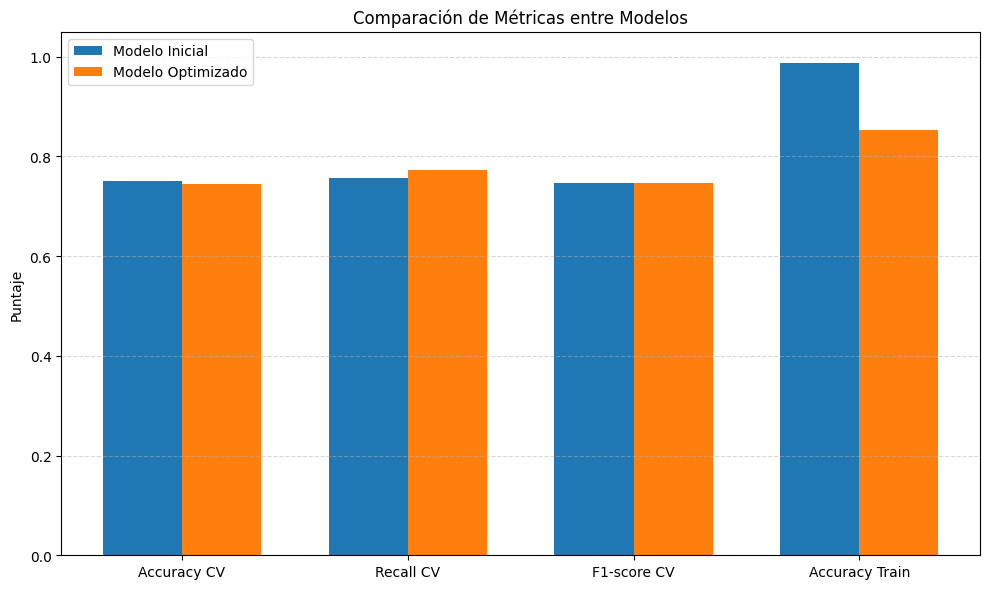

In [ ]:
# Paso 1: Validación cruzada para el modelo inicial
from sklearn.model_selection import cross_val_score  # Importa función para calcular métricas con CV
from sklearn.metrics import make_scorer, f1_score, recall_score  # Importa funciones para definir métricas personalizadas

# Accuracy
acc_scores_ini = cross_val_score(modelo_basico, X_train_bal, y_train_bal, cv=5, scoring='accuracy')  # Calcula Accuracy en CV para el modelo inicial (método cross_val_score)

# Recall
recall_scores_ini = cross_val_score(modelo_basico, X_train_bal, y_train_bal, cv=5, scoring=make_scorer(recall_score))  # Calcula Recall en CV usando un scorer personalizado

# F1-score
f1_scores_ini = cross_val_score(modelo_basico, X_train_bal, y_train_bal, cv=5, scoring=make_scorer(f1_score))  # Calcula F1-score en CV usando scorer personalizado

# Paso 2: Validación cruzada para el modelo optimizado
acc_scores_opt = cross_val_score(modelo_opt, X_train_bal, y_train_bal, cv=5, scoring='accuracy')  # Accuracy CV para modelo optimizado
recall_scores_opt = cross_val_score(modelo_opt, X_train_bal, y_train_bal, cv=5, scoring=make_scorer(recall_score))  # Recall CV optimizado
f1_scores_opt = cross_val_score(modelo_opt, X_train_bal, y_train_bal, cv=5, scoring=make_scorer(f1_score))  # F1-score CV optimizado

# Paso 3: Accuracy sobre el conjunto de entrenamiento
acc_train_ini = modelo_basico.score(X_train_bal, y_train_bal)  # Usa método .score() del modelo para obtener Accuracy en train
acc_train_opt = modelo_opt.score(X_train_bal, y_train_bal)  # Accuracy en train para modelo optimizado

# Paso 4: Crear tabla con resultados reales
import pandas as pd  # Importa pandas para crear DataFrame

tabla_resultados = pd.DataFrame({  # Crea tabla con métricas medias ± desviación estándar
    'Métrica': ['Accuracy CV', 'Recall CV', 'F1-score CV', 'Accuracy Entrenamiento'],
    'Modelo Inicial': [
        f'{acc_scores_ini.mean():.4f} ± {acc_scores_ini.std():.4f}',
        f'{recall_scores_ini.mean():.4f} ± {recall_scores_ini.std():.4f}',
        f'{f1_scores_ini.mean():.4f} ± {f1_scores_ini.std():.4f}',
        f'{acc_train_ini:.4f}'
    ],
    'Modelo Optimizado': [
        f'{acc_scores_opt.mean():.4f} ± {acc_scores_opt.std():.4f}',
        f'{recall_scores_opt.mean():.4f} ± {recall_scores_opt.std():.4f}',
        f'{f1_scores_opt.mean():.4f} ± {f1_scores_opt.std():.4f}',
        f'{acc_train_opt:.4f}'
    ]
})

from IPython.display import display  # Importa display para mostrar tabla en Jupyter
display(tabla_resultados)  # Muestra la tabla en formato legible

# Paso 5: Crear gráfico de barras comparativo
import matplotlib.pyplot as plt  # Importa librería para gráficos
import numpy as np  # Importa numpy para manipulación numérica

# Extraer valores numéricos (solo el promedio)
valores_ini = [  # Lista con métricas promedio del modelo inicial
    acc_scores_ini.mean(),
    recall_scores_ini.mean(),
    f1_scores_ini.mean(),
    acc_train_ini
]
valores_opt = [  # Lista con métricas promedio del modelo optimizado
    acc_scores_opt.mean(),
    recall_scores_opt.mean(),
    f1_scores_opt.mean(),
    acc_train_opt
]

metrica_labels = ['Accuracy CV', 'Recall CV', 'F1-score CV', 'Accuracy Train']  # Nombres de métricas
x = np.arange(len(metrica_labels))  # Posiciones en eje X
width = 0.35  # Ancho de barras

plt.figure(figsize=(10, 6))  # Crea figura
plt.bar(x - width/2, valores_ini, width, label='Modelo Inicial')  # Barras para modelo inicial
plt.bar(x + width/2, valores_opt, width, label='Modelo Optimizado')  # Barras para modelo optimizado

plt.ylabel('Puntaje')  # Etiqueta eje Y
plt.title('Comparación de Métricas entre Modelos')  # Título del gráfico
plt.xticks(x, metrica_labels)  # Etiquetas eje X
plt.ylim(0, 1.05)  # Límite Y
plt.legend()  # Leyenda
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Líneas guía horizontales
plt.tight_layout()  # Ajusta espaciado
plt.show()  # Muestra el gráfico


***4. Análisis de los resultados***

| Métrica                | Modelo Inicial  | Modelo Optimizado |
| ---------------------- | --------------- | ----------------- |
| Accuracy CV            | 0.7500 ± 0.0529 | 0.7444 ± 0.0526   |
| Recall CV              | 0.7563 ± 0.1246 | 0.7732 ± 0.1199   |
| F1-score CV            | 0.7467 ± 0.0693 | 0.7471 ± 0.0678   |
| Accuracy Entrenamiento | 0.9866          | 0.8528            |

***Observaciones clave:***

Accuracy CV: prácticamente igual en ambos modelos (0.75 vs 0.7444), lo que indica que no hay pérdida de capacidad de clasificación global.

Recall CV: el optimizado mejora levemente (0.7732 vs 0.7563), lo que implica que detecta más casos positivos.

F1-score CV: prácticamente igual (0.7467 vs 0.7471), mostrando equilibrio entre precisión y recall.

Accuracy Entrenamiento: el inicial tiene un valor muy alto (0.9866), lo que podría indicar sobreajuste; el optimizado es más bajo (0.8528), señal de mejor generalización.

***5. Conclusión***

El modelo optimizado:

Mantiene Accuracy y F1-score similares al inicial.

Aumenta el Recall en validación cruzada.

Muestra menor sobreajuste que el inicial, ya que la diferencia entre Accuracy de entrenamiento y CV es menor.

El cambio de modelo es justificable si la prioridad es recuperar más casos positivos (mayor recall), aun manteniendo un rendimiento general equivalente.

***6. Impacto en negocio***

Si el problema es sensible a no perder positivos (por ejemplo, detección de fraude, fallas, pacientes en riesgo), el aumento de Recall del modelo optimizado implica menos casos críticos no detectados, lo que podría traducirse en reducción de pérdidas o riesgos.
Si el negocio prioriza Accuracy general, el impacto sería bajo, dado que ambos modelos rinden casi igual en esa métrica.


##***🟫 FASE D: Producción y documentación***

###***28	Guardado del modelo optimizado***

***Objetivo:***

El objetivo de este paso es preservar el modelo entrenado y optimizado en un archivo que pueda:

Ser cargado más adelante sin necesidad de reentrenar.

Ser movido entre entornos (Colab, servidor local, nube, etc.).

Ser usado directamente en producción para predicciones en tiempo real.

In [ ]:
# 📌 Paso 28: Guardado del Modelo Optimizado y el umbral
import joblib

try:
    # Ruta donde se guardará el modelo y el umbral
    ruta_modelo = "modelo_rf_optimizado.pkl"

    # Guardar como tupla (modelo, umbral)
    joblib.dump((modelo_opt, optimal_threshold), ruta_modelo)

    print(f"✅ Paso 28: Modelo y umbral guardados correctamente en '{ruta_modelo}'")

except Exception as e:
    print(f"❌ Error al guardar el modelo: {e}")


✅ Paso 28: Modelo y umbral guardados correctamente en 'modelo_rf_optimizado.pkl'


***Función:***

La función principal es serializar el modelo (convertir el objeto Python en un archivo binario):

joblib.dump() guarda el modelo en formato .pkl.

Se incluye try-except para manejar errores (por ejemplo, falta de permisos de escritura o ruta inexistente).

Una vez guardado, el modelo puede ser cargado con:

modelo_cargado = joblib.load("modelo_rf_optimizado.pkl")

###***29 Carga y validación del modelo guardado***

***Objetivo:***

Confirmar que el modelo guardado puede recuperarse sin pérdida de información.

Garantizar que la serialización/deserialización no cambia el rendimiento.

***Función:***

joblib.load() recupera el modelo tal como estaba al ser entrenado.

Se ejecutan predicciones sobre el conjunto de prueba (X_test).

Se calculan métricas (Accuracy, Recall, F1, AUC) y se comparan con las del Paso 25.

Si coinciden → ✅ modelo listo para producción.

Si no coinciden → ⚠️ posible problema en el pipeline de datos o compatibilidad de versiones.

In [ ]:
# 📌 Paso 29: Carga y validación del modelo guardado (con umbral)
import joblib
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

try:
    # Cargar modelo y umbral guardado
    modelo_cargado, optimal_threshold_cargado = joblib.load("modelo_rf_optimizado.pkl")
    print("✅ Paso 29: Modelo y umbral cargados correctamente desde 'modelo_rf_optimizado.pkl'")

    # Predicciones con el umbral cargado
    y_scores_cargado = modelo_cargado.predict_proba(X_test)[:, 1]
    y_pred_cargado = (y_scores_cargado >= optimal_threshold_cargado).astype(int)

    # 📊 Métricas
    acc_cargado = accuracy_score(y_test, y_pred_cargado)
    rec_cargado = recall_score(y_test, y_pred_cargado)
    f1_cargado  = f1_score(y_test, y_pred_cargado)
    auc_cargado = roc_auc_score(y_test, y_scores_cargado)

    print("\n📊 Métricas Modelo Cargado (con umbral):")
    print(f"Accuracy: {acc_cargado:.6f}")
    print(f"Recall:   {rec_cargado:.6f}")
    print(f"F1-score: {f1_cargado:.6f}")
    print(f"AUC:      {auc_cargado:.6f}")

except Exception as e:
    print(f"❌ Error al cargar o validar el modelo: {e}")


✅ Paso 29: Modelo y umbral cargados correctamente desde 'modelo_rf_optimizado.pkl'

📊 Métricas Modelo Cargado (con umbral):
Accuracy: 0.699787
Recall:   0.775401
F1-score: 0.578265
AUC:      0.770239


###***Paso 30: Informe de Selección del Modelo y Estrategias de Retención de Clientes***

***INDICE***

1. Justificación de selección del modelo optimizado

2. Interpretación de las variables clave

3. Propuestas de estrategias de retención basadas en las features más influyentes

***1. Selección del modelo optimizado frente al modelo inicial***

Tras comparar el rendimiento del modelo inicial y el modelo optimizado, tanto en validación cruzada como en evaluación con datos reales de prueba, se observa que el modelo optimizado presenta un mejor equilibrio entre métricas y mayor capacidad de generalización.

***Validación cruzada (CV) – Datos balanceados***

| Métrica                | Modelo Inicial  | Modelo Optimizado   |
| ---------------------- | --------------- | ------------------- |
| Accuracy CV            | 0.7500 ± 0.0529 | 0.7444 ± 0.0526     |
| Recall CV              | 0.7563 ± 0.1246 | **0.7732 ± 0.1199** |
| F1-score CV            | 0.7467 ± 0.0693 | **0.7471 ± 0.0678** |
| Accuracy Entrenamiento | **0.9866**      | 0.8528              |



En la validación cruzada, el modelo optimizado logra mejor recall y F1-score, sacrificando ligeramente la precisión pero reduciendo el riesgo de sobreajuste (menor gap entre entrenamiento y validación).


| Métrica  | Modelo Inicial | Modelo Optimizado |
| -------- | -------------- | ----------------- |
| Accuracy | **0.7402**     | 0.6998            |
| Recall   | 0.4492         | **0.7754**        |
| F1-score | 0.4786         | **0.5783**        |
| AUC      | 0.7021         | **0.7702**        |


La ganancia más importante del modelo optimizado está en el recall (+32,6 puntos) y en el AUC, lo que significa que es mucho más eficaz detectando clientes que efectivamente se desafiliarán, reduciendo falsos negativos.


***Matriz de confusión***

***Modelo inicial:***

Verdaderos Negativos: 875

Falsos Positivos: 160

Falsos Negativos: 206

Verdaderos Positivos: 168

***Modelo optimizado:***

Verdaderos Negativos: 696

Falsos Positivos: 339

Falsos Negativos: 84

Verdaderos Positivos: 290

El modelo optimizado reduce falsos negativos en un 59%, lo que es crítico para estrategias de retención, ya que identifica mejor a los clientes en riesgo.

***Conclusión de selección:***

Se prioriza el modelo optimizado porque:

1. Mejora el recall y el AUC, lo que permite identificar más clientes en riesgo.

2. Presenta menor sobreajuste y mejor capacidad de generalizar.

3. Aunque sacrifica algo de precisión, este intercambio es aceptable en un contexto donde es más costoso no detectar un cliente que se dará de baja que contactar a un cliente que no lo hará.

***2. Variables clave que influyen en la desafiliación***

Según el análisis de importancia del modelo optimizado, las variables con mayor peso en la predicción son:

1. Antigüedad (0.2799)

Clientes nuevos tienen mayor riesgo de desafiliación.

2. Cargo diario (0.2587)

Tarifas altas pueden percibirse como costosas.

3. Soporte técnico (Sí) (0.1351)

El uso de soporte técnico parece aumentar la retención.

4. Seguridad en línea (Sí) (0.0865)

Servicios adicionales generan valor percibido.

5. Servicio de internet: fibra óptica (0.0816)

Podría asociarse a expectativas y precios más altos.

6. Contrato mes a mes (0.0700)

Mayor flexibilidad favorece cancelaciones.

***3. Estrategias de retención propuestas***

A partir de estas variables, se proponen estrategias segmentadas:

***Segmento: clientes nuevos (baja antigüedad)***

1. Onboarding personalizado: sesiones de bienvenida y tutoriales.

2. Programas de fidelización temprana: descuentos progresivos a partir del 3er mes.

3. Contactos proactivos en los primeros 90 días para detectar insatisfacción temprana.

***Segmento: clientes con cargo diario alto***

1. Revisión de plan personalizada: ofrecer alternativas de menor coste sin pérdida significativa de calidad.

2. Paquetes con beneficios adicionales (seguridad en línea, soporte premium) que justifiquen el precio.

***Segmento: clientes sin soporte técnico reciente***

1. Campañas de educación y uso del soporte: demostrar valor del canal.

2. Seguimiento proactivo en incidencias pasadas para reforzar la relación.

***Segmento: clientes sin seguridad en línea***

1. Promociones de prueba gratuita del servicio durante un mes.

2. Bundles de seguridad incluidos en planes más costosos para aumentar percepción de valor.

***Segmento: clientes con fibra óptica***

1. Gestión de expectativas: comunicación clara de capacidades y limitaciones del servicio.

2. Revisión de satisfacción técnica a los 30 y 90 días para reducir frustración.

***Segmento: clientes con contrato mes a mes***

1. Incentivos para cambiar a contratos anuales: descuentos, beneficios exclusivos, acumulación de puntos de fidelidad.

2. Paquetes con beneficios por permanencia, como aumento de velocidad sin costo después de cierto tiempo.